# Introduction

In April of 2015 the 7.8 magnitude Gorkha earthquake occured near the Gorkha district of Gandaki Pradesh, Nepal. Almost 9,000 lives were lost, millions of people were instantly made homeless, and $10 billion in damages––about half of Nepal's nominal GDP––were incurred. In the years since, the Nepalese government has worked intensely to help rebuild the affected districts' infrastructures. Throughout this process, the National Planning Commission, along with Kathmandu Living Labs and the Central Bureau of Statistics, has generated one of the largest post-disaster datasets ever collected, containing valuable information on earthquake impacts, household conditions, and socio-economic-demographic statistics.

The data comes from the 2015 Nepal Earthquake Open Data Portal, and mainly consists of information on the buildings' structure and their legal ownership. Each row in the dataset represents a specific building in the region that was hit by Gorkha earthquake.

The goal of this project is to predict the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal.

In [1]:
# import required dependencies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10, 6)
import seaborn as sns
pd.set_option('display.max_columns',None) 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read files
df=pd.read_csv('feature_values.csv')
labels=pd.read_csv('labels.csv')

In [3]:
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [4]:
labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [5]:
# joining df and labels dataframe
df = df.merge(labels, how='left', on='building_id')
df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2


# Basic Checks

In [6]:
print('Shape of the DataFrame:',df.shape)

Shape of the DataFrame: (260601, 40)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [8]:
df.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
df.describe(include='O')

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
count,260601,260601,260601,260601,260601,260601,260601,260601
unique,3,5,3,5,4,4,10,4
top,t,r,n,f,q,s,d,v
freq,216757,219196,182842,209619,165282,202090,250072,250939


In [10]:
print('Datatype of Each Column: \n',df.dtypes)

Datatype of Each Column: 
 building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick       

In [11]:
print('Duplicated Values: ',df.duplicated().sum())

Duplicated Values:  0


# Missing Values

In [12]:
df.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

>There are no Missing Values present in the dataset.

# Target Variable

In [13]:
df.damage_grade.value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

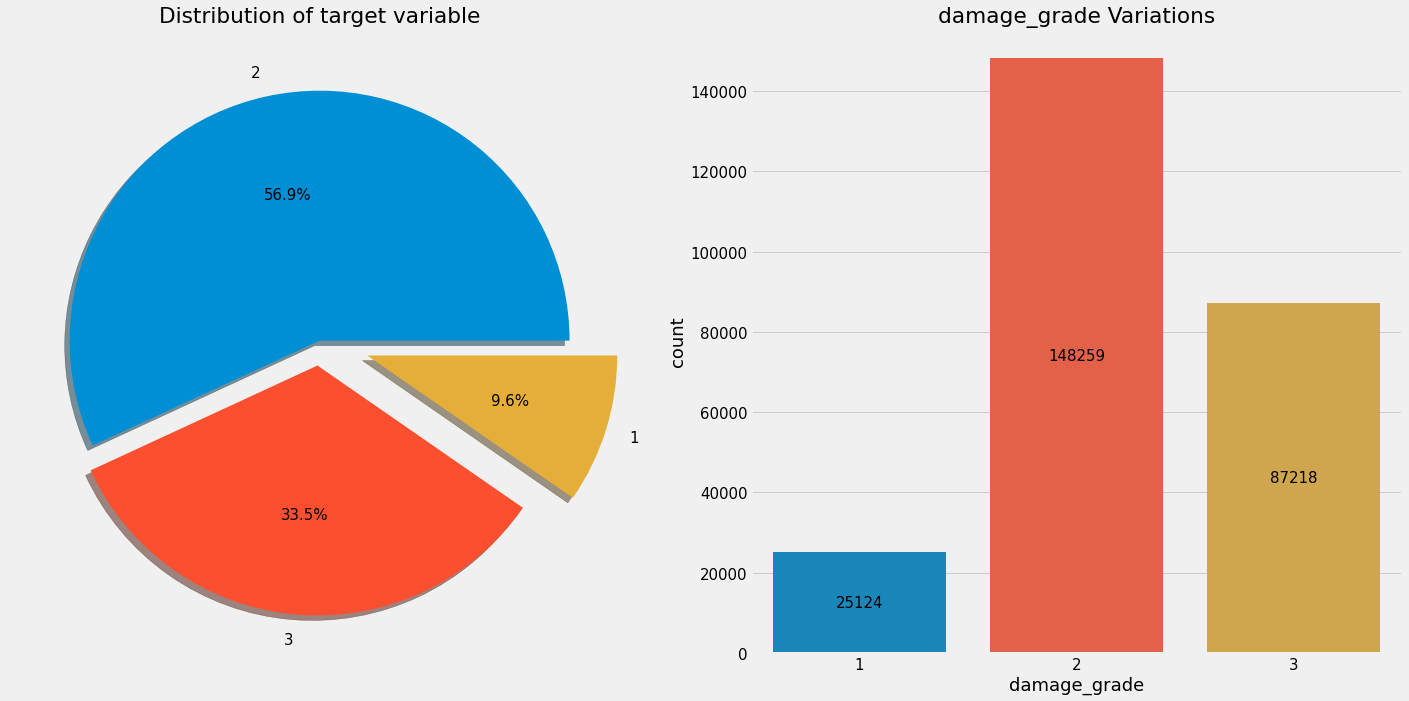

In [14]:
f,ax=plt.subplots(1,2,figsize=(20,10))
df.damage_grade.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],explode=[0,0.1,0.2],shadow=True)
ax[0].set_title('Distribution of target variable')
ax[0].set_ylabel('')
sns.countplot('damage_grade',data=df,ax=ax[1])
annotations = ax[1].bar_label(ax[1].containers[0], fmt='%g',label_type='center')
ax[1].set_title('damage_grade Variations')
plt.tight_layout()
plt.show()
# colors are not matching. Please observe the labels

There are 3 grades of the damage:
   -	1 represents low damage 
   -	2 represents a medium amount of damage 
   -	3 represents almost complete destruction 
   
It is also an imbalanced multiclass classification problem.

# Geo_Level_ID

In [15]:
geo_id=['geo_level_1_id','geo_level_2_id','geo_level_3_id']

>- geo_level_1_id, geo_level_2_id, geo_level_3_id : 
geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). 
>- Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567. 

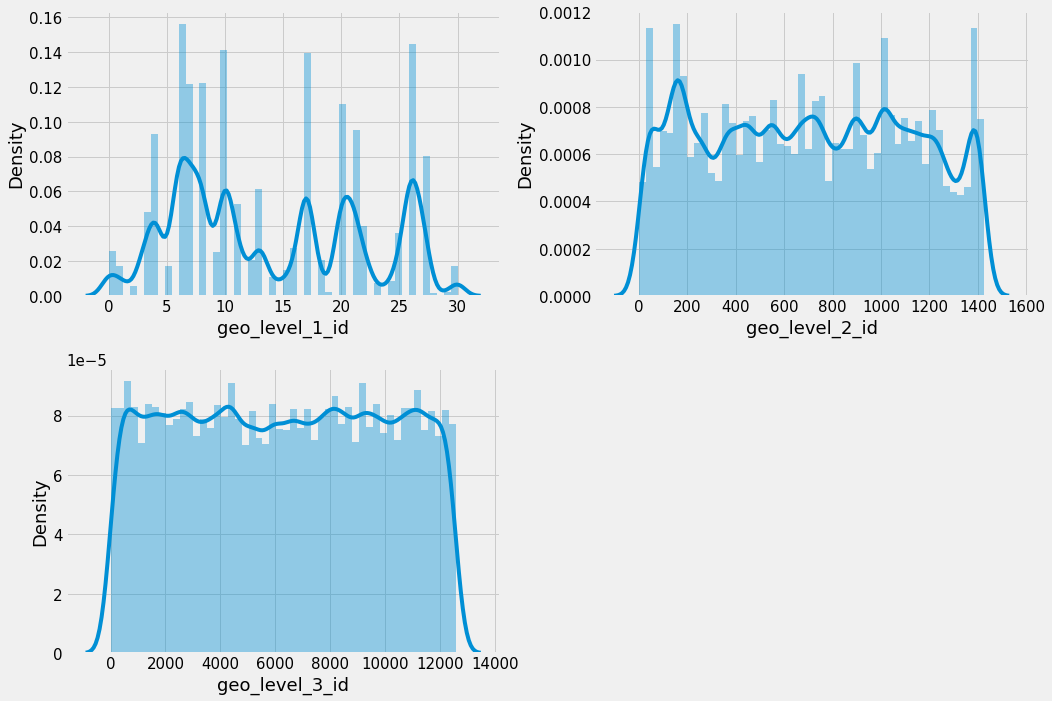

In [16]:
# Univariate Analysis

plt.figure(figsize=(15,10))
plotnum=1
for feature in geo_id:
    if plotnum<=3:
        ax=plt.subplot(2,2,plotnum) 
        sns.distplot(df[feature])
    plotnum+=1
plt.tight_layout() 

> It looks like the buildings are uniformly distributed among various regious and especially sub-regions.

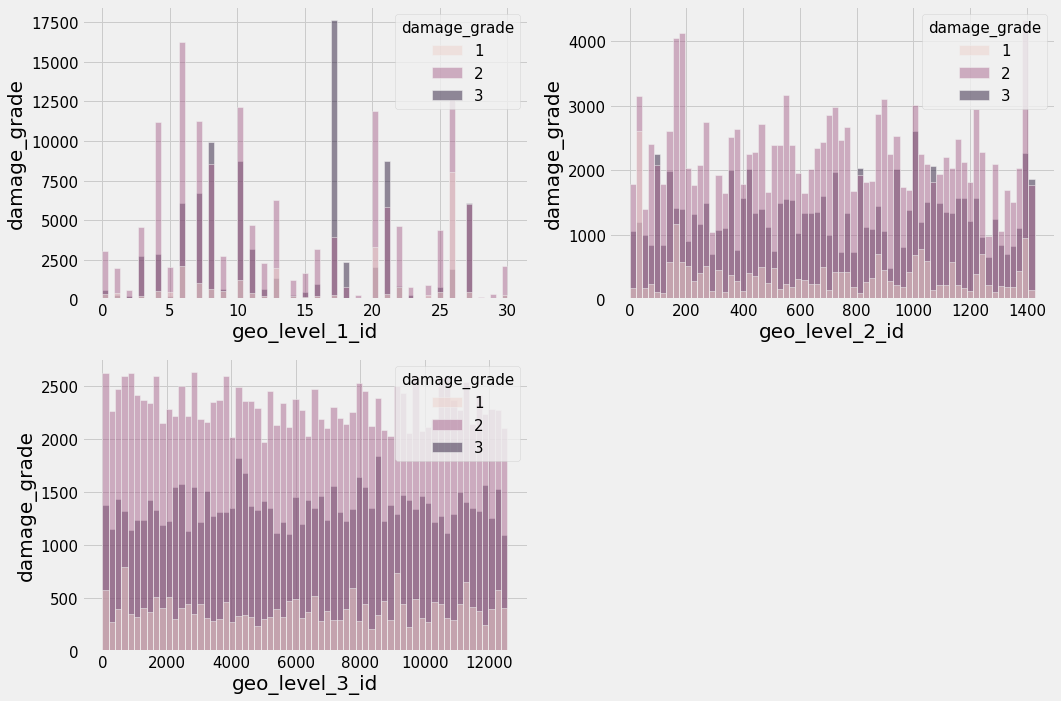

In [17]:
# Bivariate Analysis

plt.figure(figsize=(15,10))
plotnum = 1

for feature in geo_id:
    if plotnum<=3 :
        ax = plt.subplot(2,2,plotnum)
        sns.histplot(x=df[feature],hue=df.damage_grade)
        plt.xlabel(feature,fontsize=20)
        plt.ylabel('damage_grade',fontsize=20)
    plotnum+=1
plt.tight_layout()

>Most of the buildings were more than moderately damaged due to the earthquake

# Remaining Numerical features

In [18]:
num_fe_unfiltered = [feature for feature in df.columns if df[feature].dtype!='O' and  feature not in ['building_id','geo_level_1_id','geo_level_2_id','geo_level_3_id','damage_grade']]
num_fe_unfiltered

['count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other']

# Some Numerical Features are actually Categorical

In [19]:
num_to_cat = [feature for feature in num_fe_unfiltered if 'has' in  feature]
num_to_cat

['has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other']

In [20]:
final_num_fe=[feature for feature in num_fe_unfiltered if feature not in num_to_cat]
final_num_fe

['count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'count_families']

# Discrete Features

In [21]:
dis_fe = ['count_floors_pre_eq','count_families']

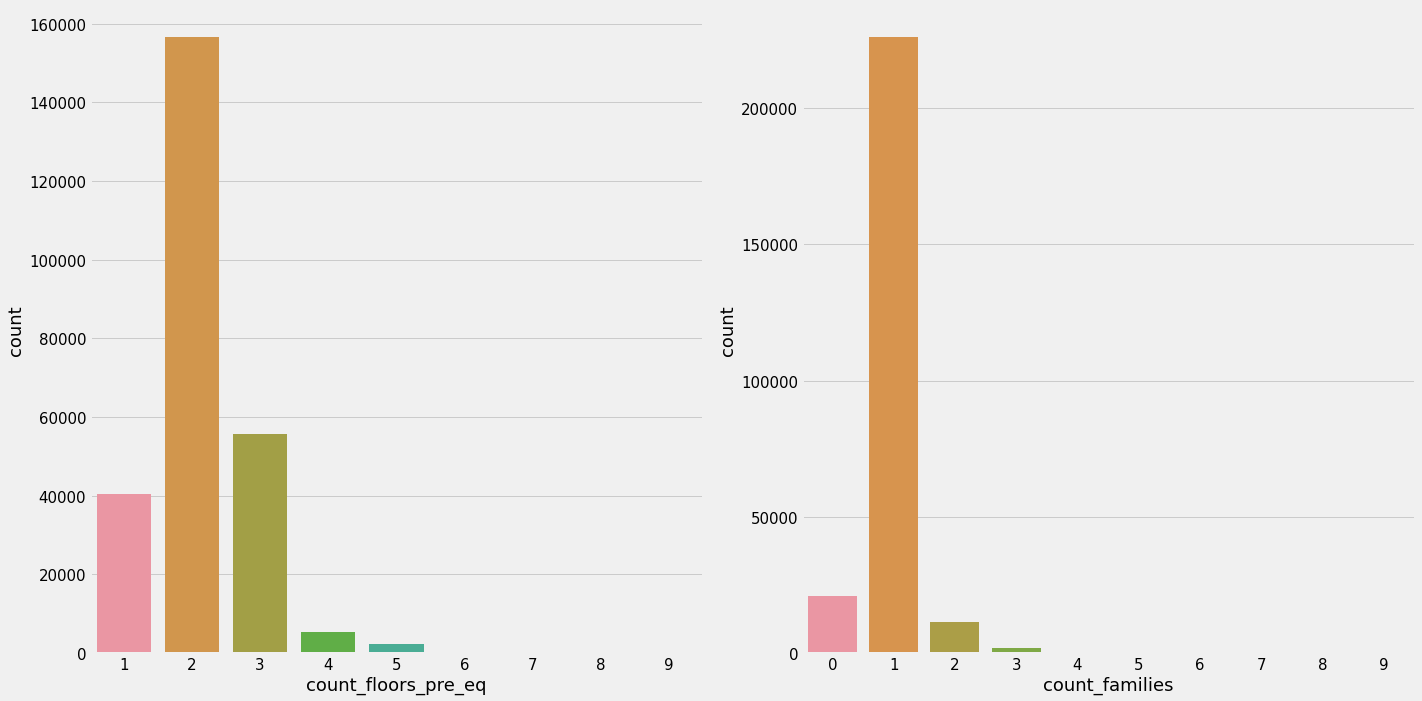

In [22]:
# Univariate Analysis
plt.figure(figsize=(20,10))
plotnum=1
for feature in dis_fe:
    if(plotnum<=2):
        ax=plt.subplot(1,2,plotnum) 
        sns.countplot(df[feature])
    plotnum+=1
plt.tight_layout() 

> - Most buildings had 2-3 floors in it with 2 floors being the highest.
> - Most of the buildings had only 1 familiy living in them. We also have buildings were up to 9 families were living in, these buildings could be the same as those buildings with 9 floors.

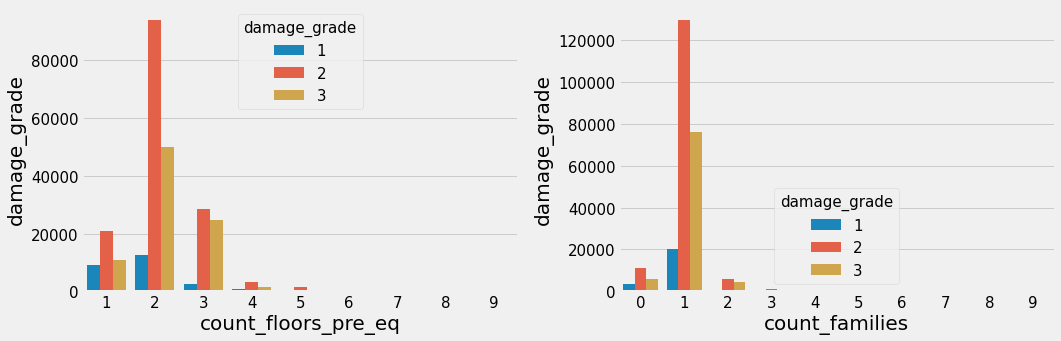

In [23]:
# Bivariate Analysis : 

plt.figure(figsize=(15,5))
plotnum = 1

for feature in dis_fe:
    if plotnum<=2 :
        ax = plt.subplot(1,2,plotnum)
        sns.countplot(x=df[feature],hue=df.damage_grade)
        plt.xlabel(feature,fontsize=20)
        plt.ylabel('damage_grade',fontsize=20)
    plotnum+=1
plt.tight_layout()

Biuldings with 1 and 2 floors had moderate building damages but when you look at buildings with 3 floors most of it were severely damaged as well indicating maybe that they might not have been constructed properly or due to the height of the building.

buildings with only 1 family living in it faced moderate building damages.

# Continous Features

In [24]:
conti_fe = ['age','area_percentage','height_percentage']

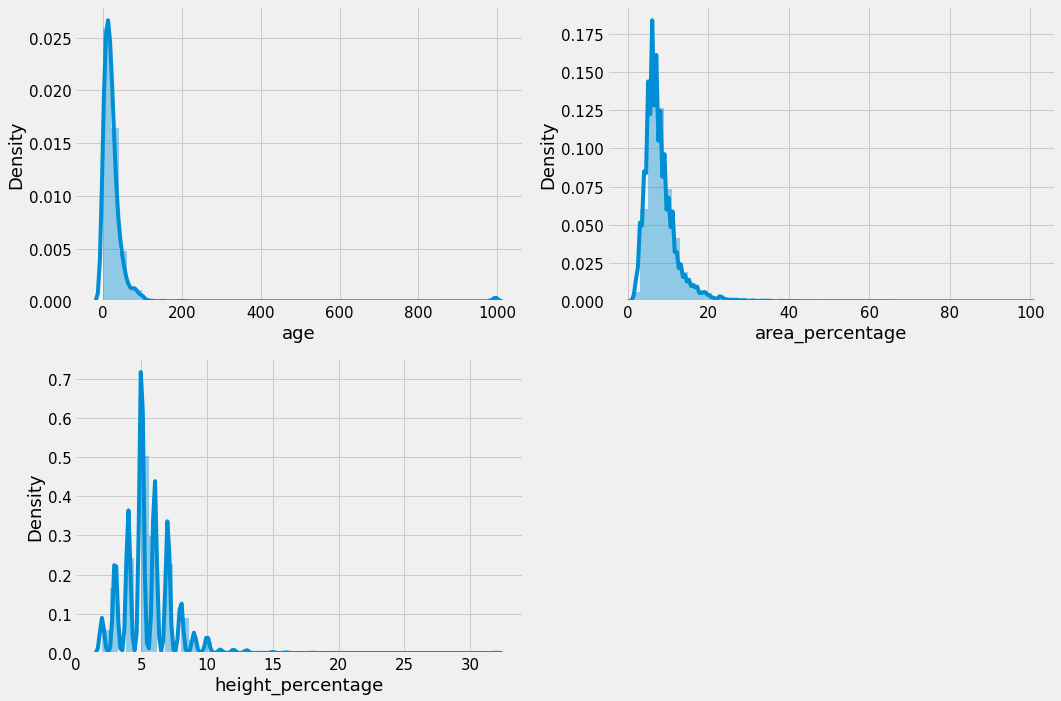

In [25]:
# Univariate Analysis

plt.figure(figsize=(15,10))
plotnum=1
for feature in conti_fe:
    if plotnum<=3:
        ax=plt.subplot(2,2,plotnum) 
        sns.distplot(df[feature])
    plotnum+=1
plt.tight_layout() 

> - Most buildings are aged 0-100 years of age. We have buildings around 995 years old, which at first glance seems like a error in the collection of data. After a quick Google search, I was able to determine that buildings in Nepal can be that old. Nevertheless, we still have to deal with the outliers
> - The normalized area of the building footprint is less than 20% for most buildings. It is important to mention that some values go up to 100%, so it is important for us to take care of the outliers of this feature.
> - Most of the data for height percentage is less than 10%, Highest height percentage being more than 30 % maybe due to the fact the in some buildings floor count is upto 9.

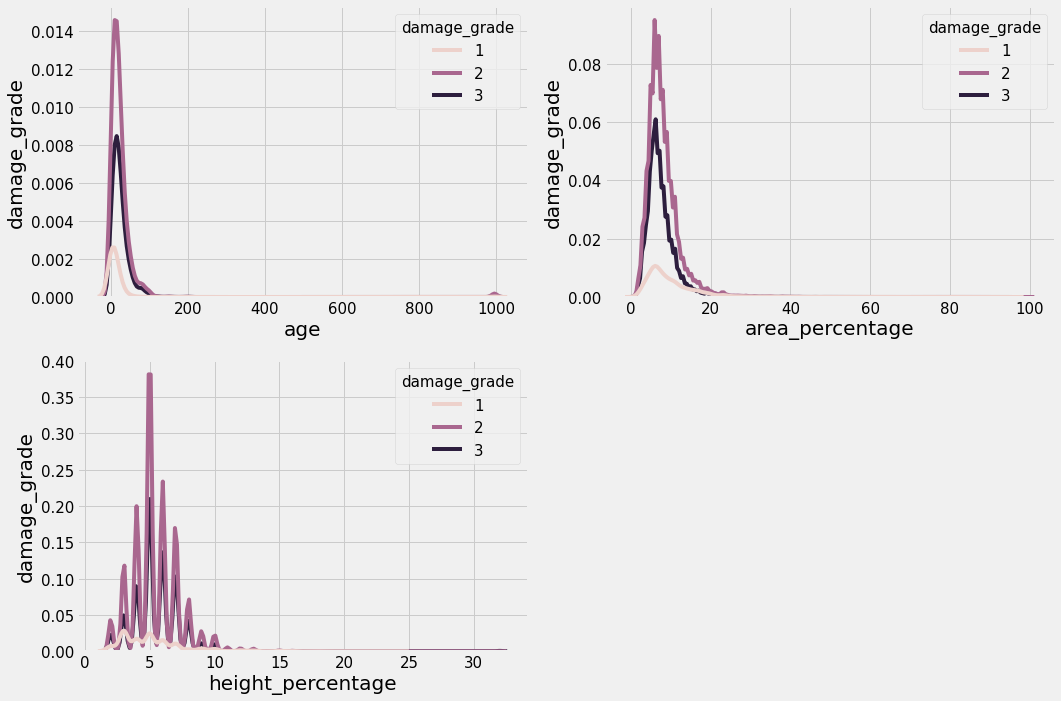

In [26]:
# Bivariate Analysis

plt.figure(figsize=(15,10))
plotnum = 1

for feature in conti_fe:
    if plotnum<=3 :
        ax = plt.subplot(2,2,plotnum)
        sns.kdeplot(x=df[feature],hue=df.damage_grade)
        plt.xlabel(feature,fontsize=20)
        plt.ylabel('damage_grade',fontsize=20)
    plotnum+=1
plt.tight_layout()

> - Despite the age of building ,most of the time the damage caused to the building is Average damage. With no suprise, newer buildings where less damaged. 
> - As the area of the buliding increases the damaged caused to it also increases. 
> - As the height of the buliding increases the damaged caused to it also increases. 

# Categorical features

In [27]:
cat_fe = [feature for feature in df.columns if df[feature].dtype=='O']
cat_fe

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

# Number of Unique Categories in each Feature

In [28]:
for feature in cat_fe:
    print('The no. of unique categories in {} feature is : {}'.format(feature,df[feature].nunique()))

The no. of unique categories in land_surface_condition feature is : 3
The no. of unique categories in foundation_type feature is : 5
The no. of unique categories in roof_type feature is : 3
The no. of unique categories in ground_floor_type feature is : 5
The no. of unique categories in other_floor_type feature is : 4
The no. of unique categories in position feature is : 4
The no. of unique categories in plan_configuration feature is : 10
The no. of unique categories in legal_ownership_status feature is : 4


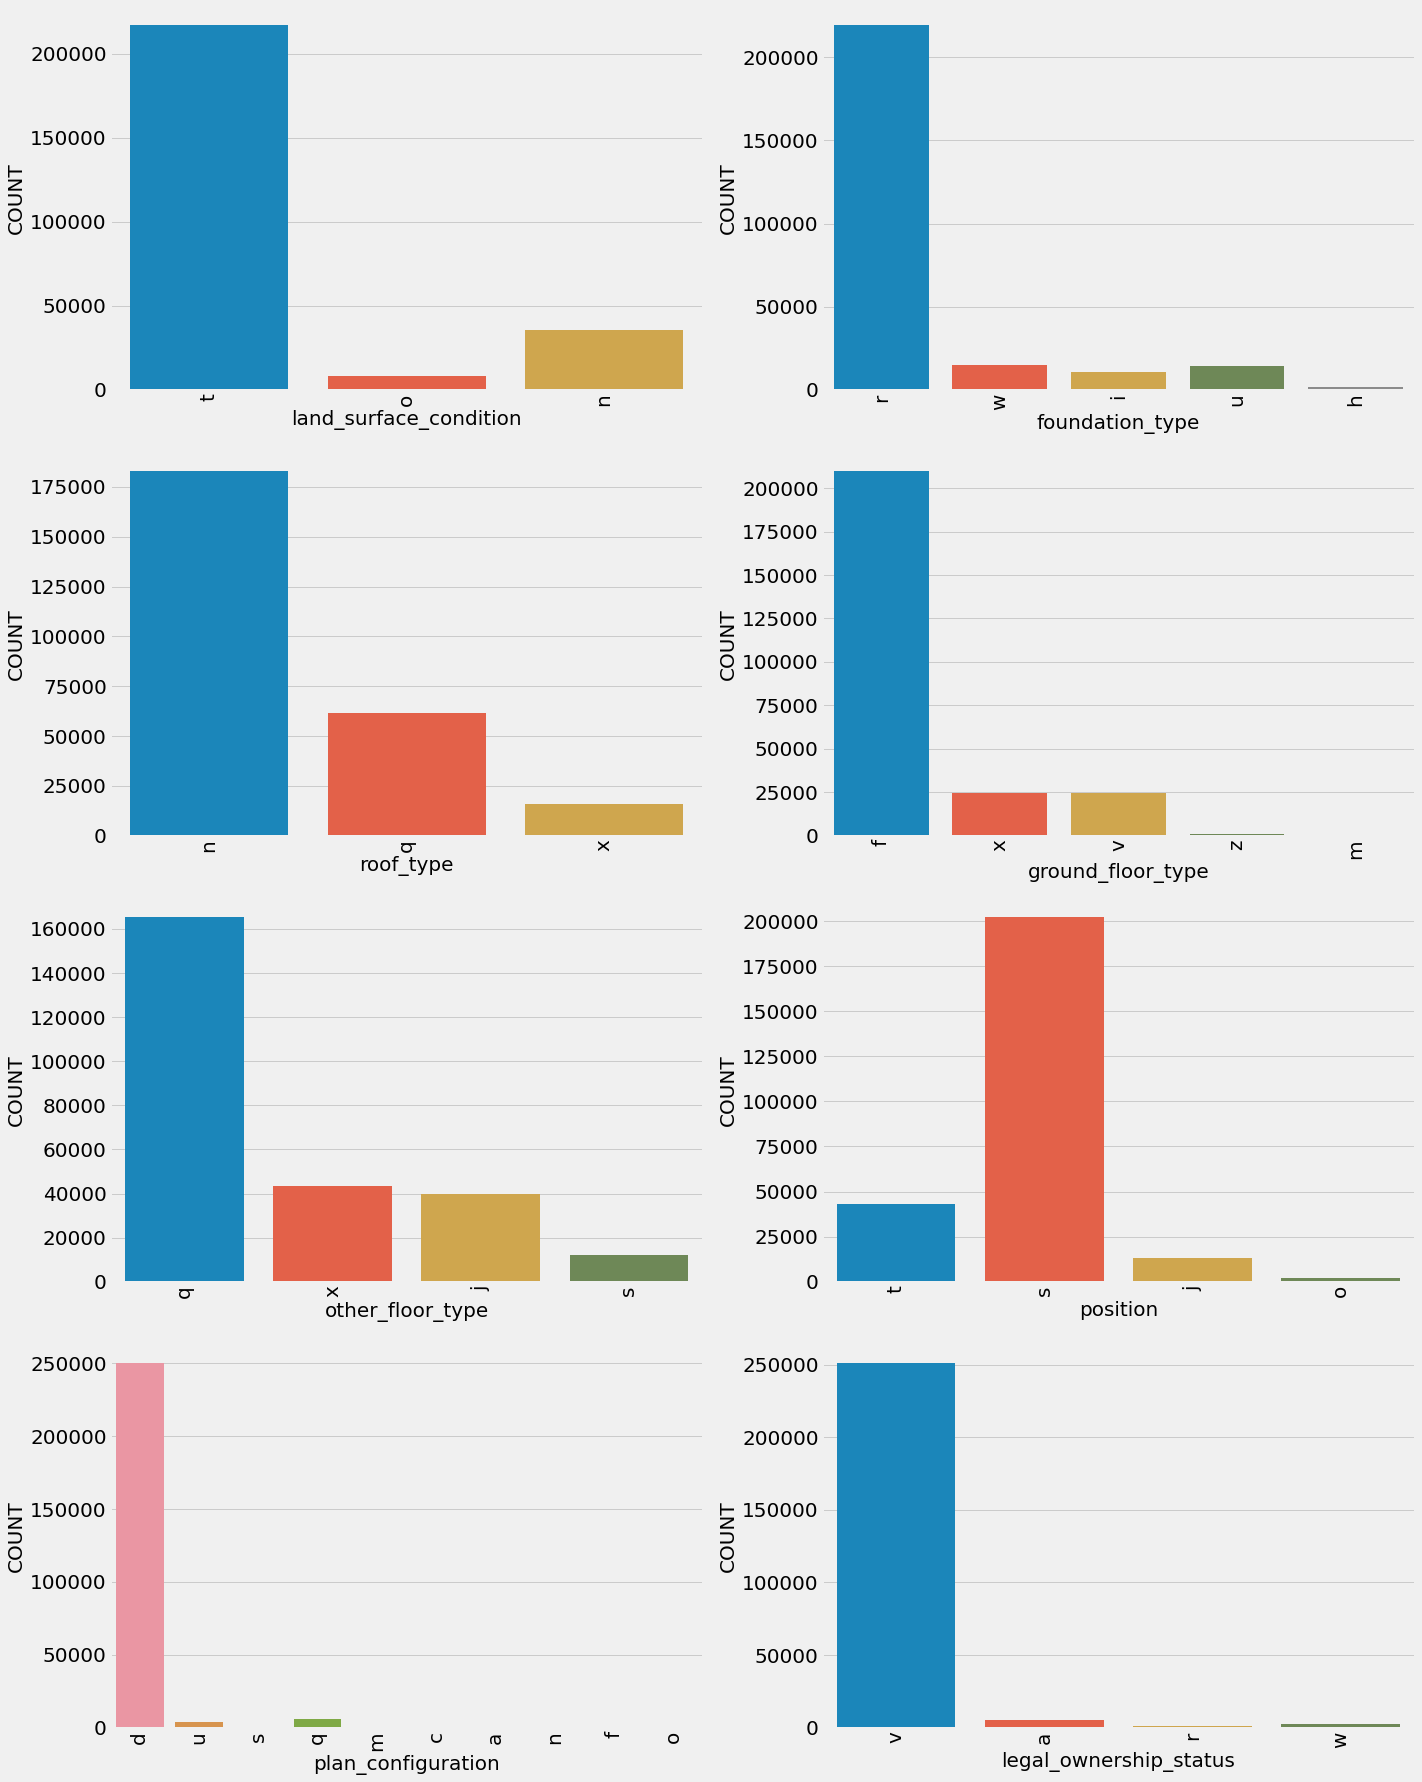

In [29]:
# Univariate Analysis

plt.figure(figsize=(20,25))
plotnum=1
for feature in cat_fe:
    if(plotnum<=len(cat_fe)): 
        ax=plt.subplot(4,2,plotnum) 
        sns.countplot(df[feature])
        plt.xlabel(feature,fontsize=20) 
        plt.ylabel('COUNT',fontsize=20)
        plt.xticks(fontsize=20,rotation=90)
        plt.yticks(fontsize=20)
    plotnum+=1
plt.tight_layout()  

> All of these object variables had one majority type, be it plan configurations, foundation type etc, which tells us that these buildings in all these regious may have been constructed by a single group or single company, etc. If we had decriptions of all categories in these variables maybe we could have understood them better.

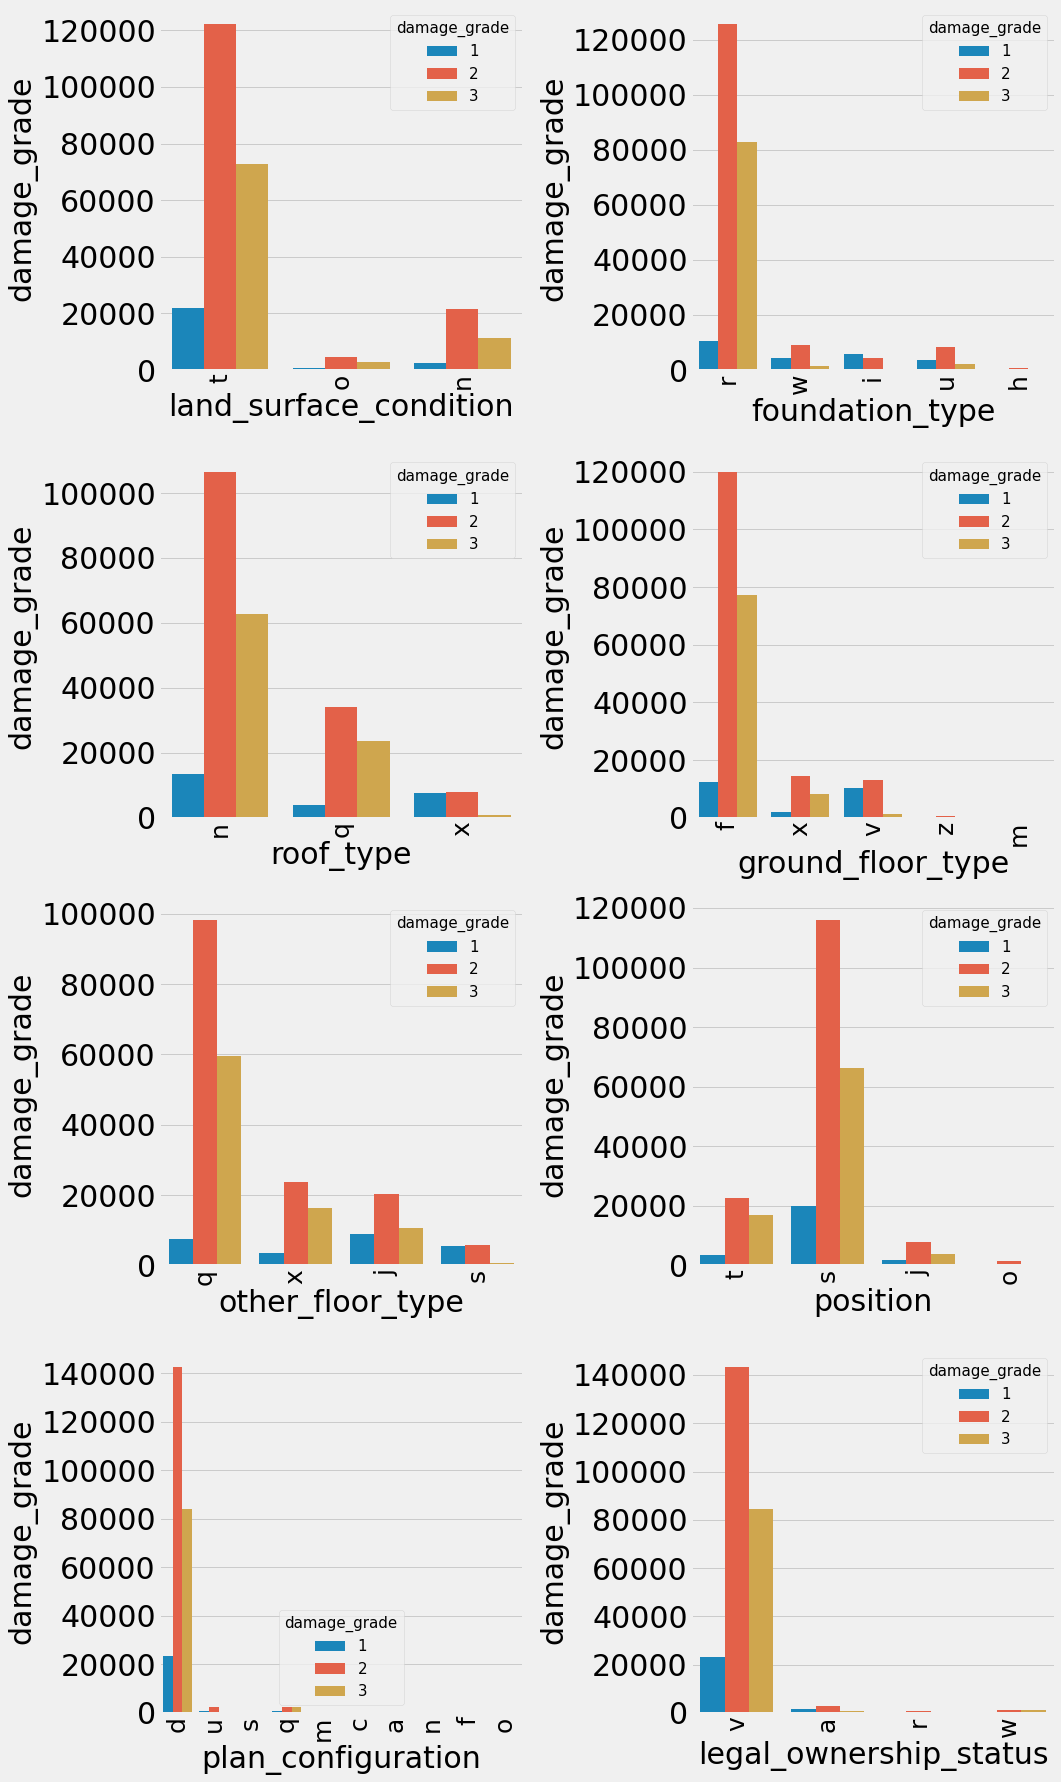

In [30]:
# Bivariate Analysis

plt.figure(figsize=(15,25))
plotnum = 1

for feature in cat_fe:
    if plotnum<=len(cat_fe):
        ax = plt.subplot(4,2,plotnum)
        sns.countplot(x=df[feature]
                        ,hue=df.damage_grade)
        plt.xlabel(feature,fontsize=30) 
        plt.ylabel('damage_grade',fontsize=30)
        plt.xticks(fontsize=25,rotation=90)
        plt.yticks(fontsize=30)
    plotnum+=1
plt.tight_layout()

> All of the buildings damages were moderately damaged but as you can see the severity damage count is also very high.

# Analysis of a few Numerical Features which are actually Categorical

> <font color = 'chocolate'>So now the total number of categorical features becomes `8+22=30` </font>

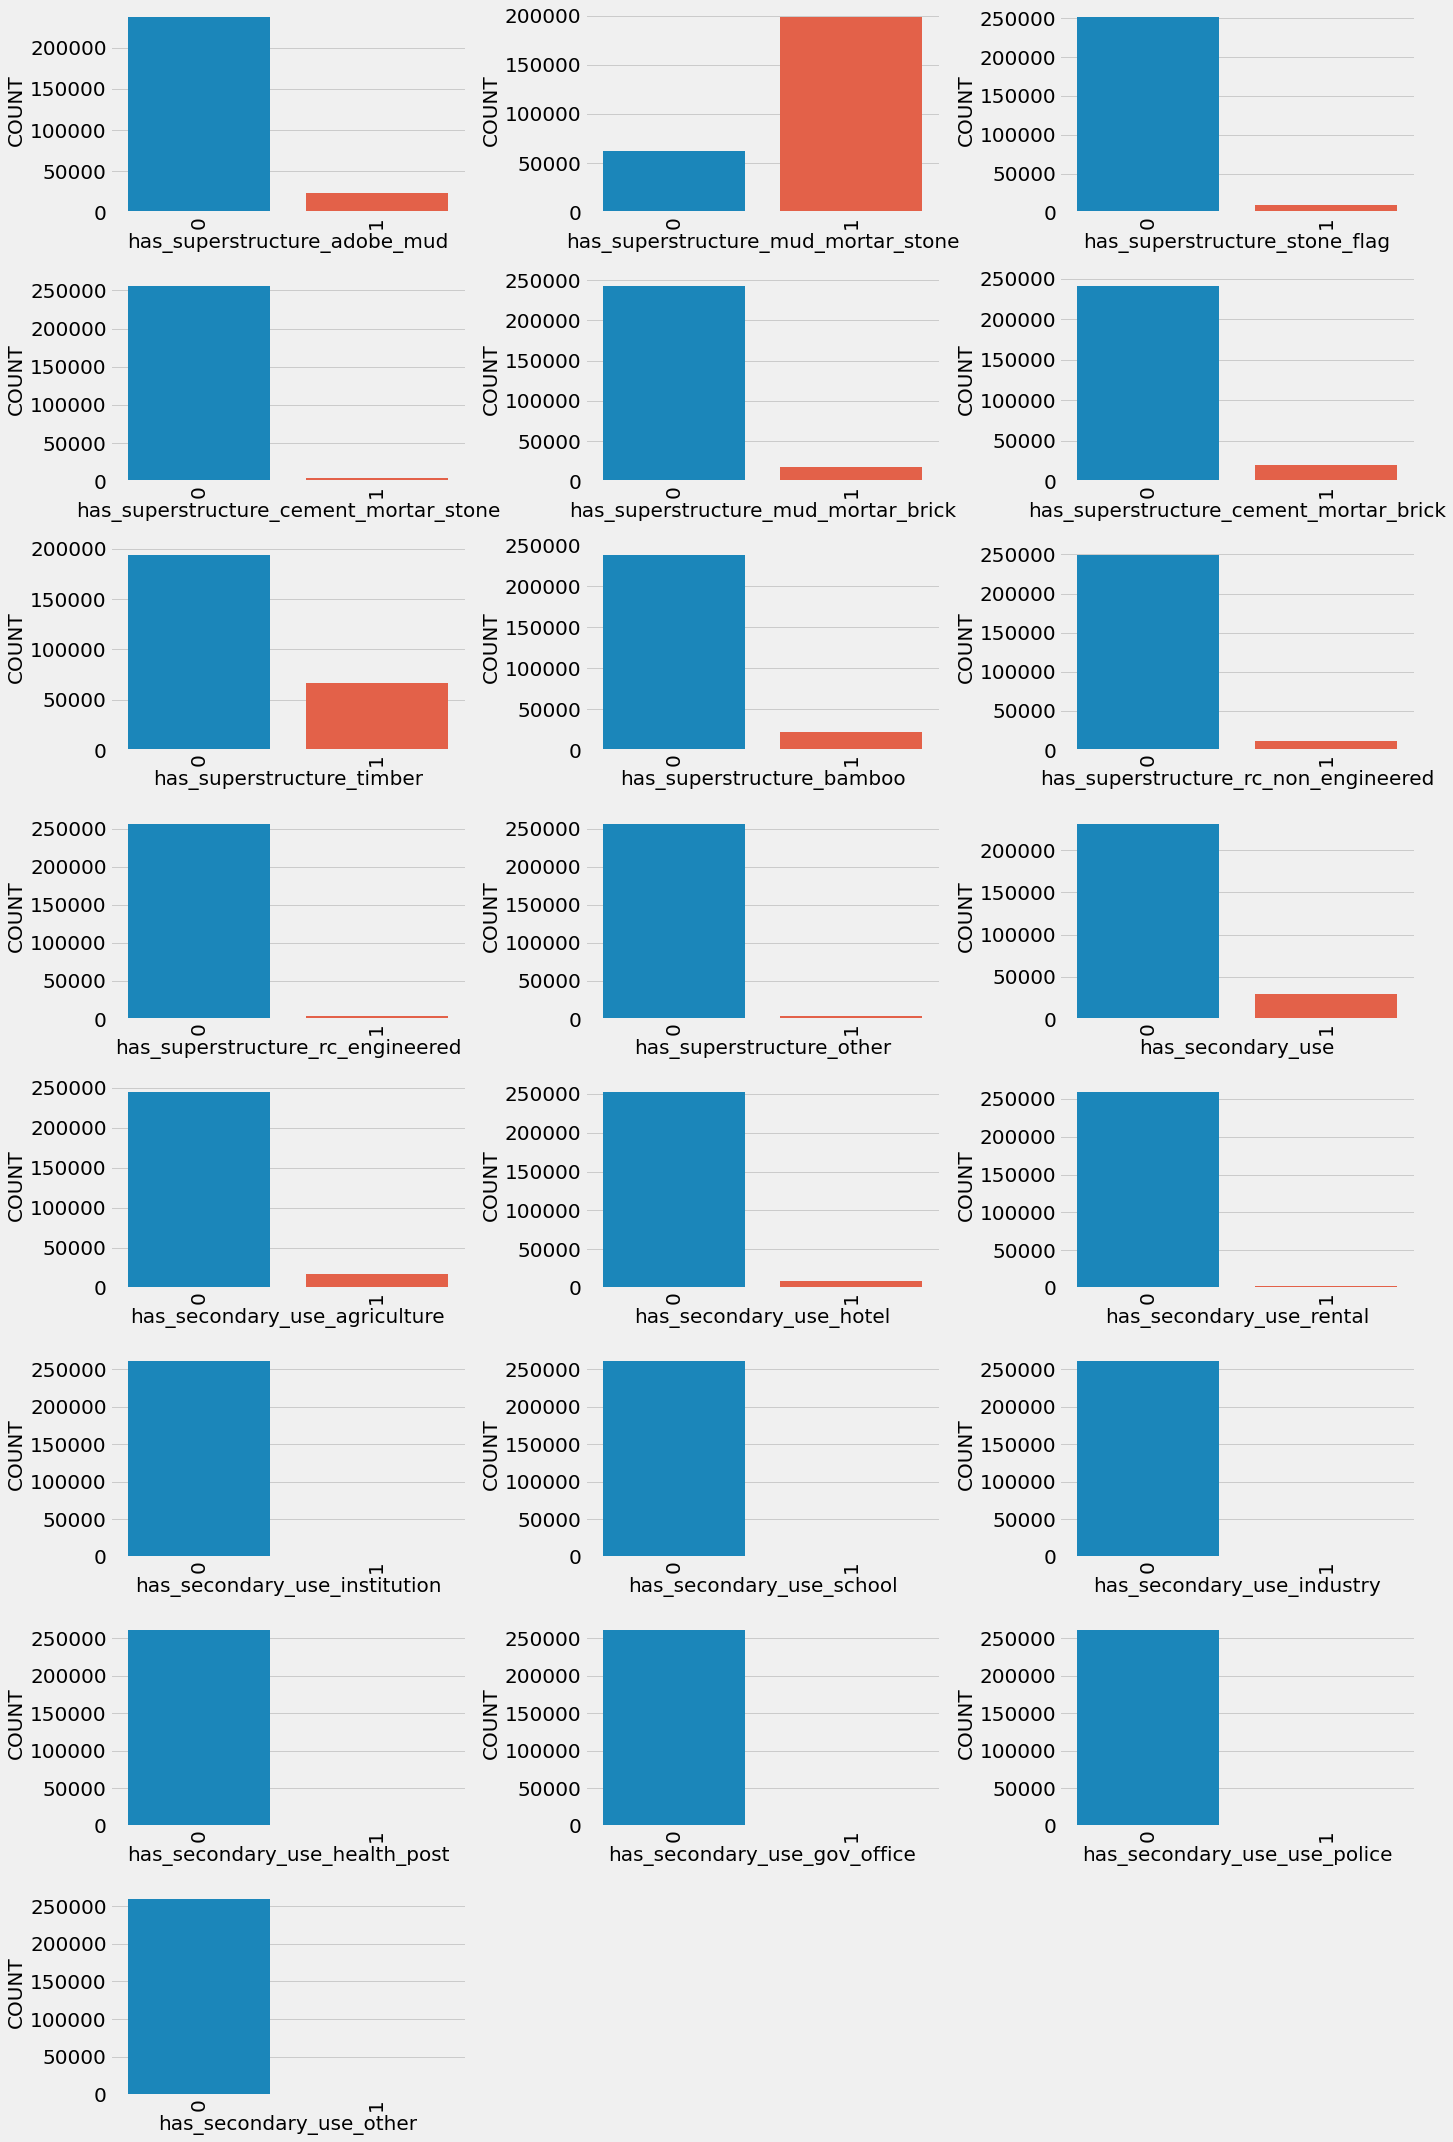

In [31]:
# Univariate Analysis

plt.figure(figsize=(20,30))
plotnum=1
for feature in num_to_cat:
    if(plotnum<=len(num_to_cat)): 
        ax=plt.subplot(8,3,plotnum) 
        sns.countplot(df[feature])
        plt.xlabel(feature,fontsize=20) 
        plt.ylabel('COUNT',fontsize=20)
        plt.xticks(fontsize=20,rotation=90)
        plt.yticks(fontsize=20)
    plotnum+=1
plt.tight_layout()  

> - Some buildings that have superstructures are from multiple materials.
> - Most of the buldings superstructure was made of Mud Mortar - Stone. 
> - So there is a very small number of buildings with multiple secondary uses

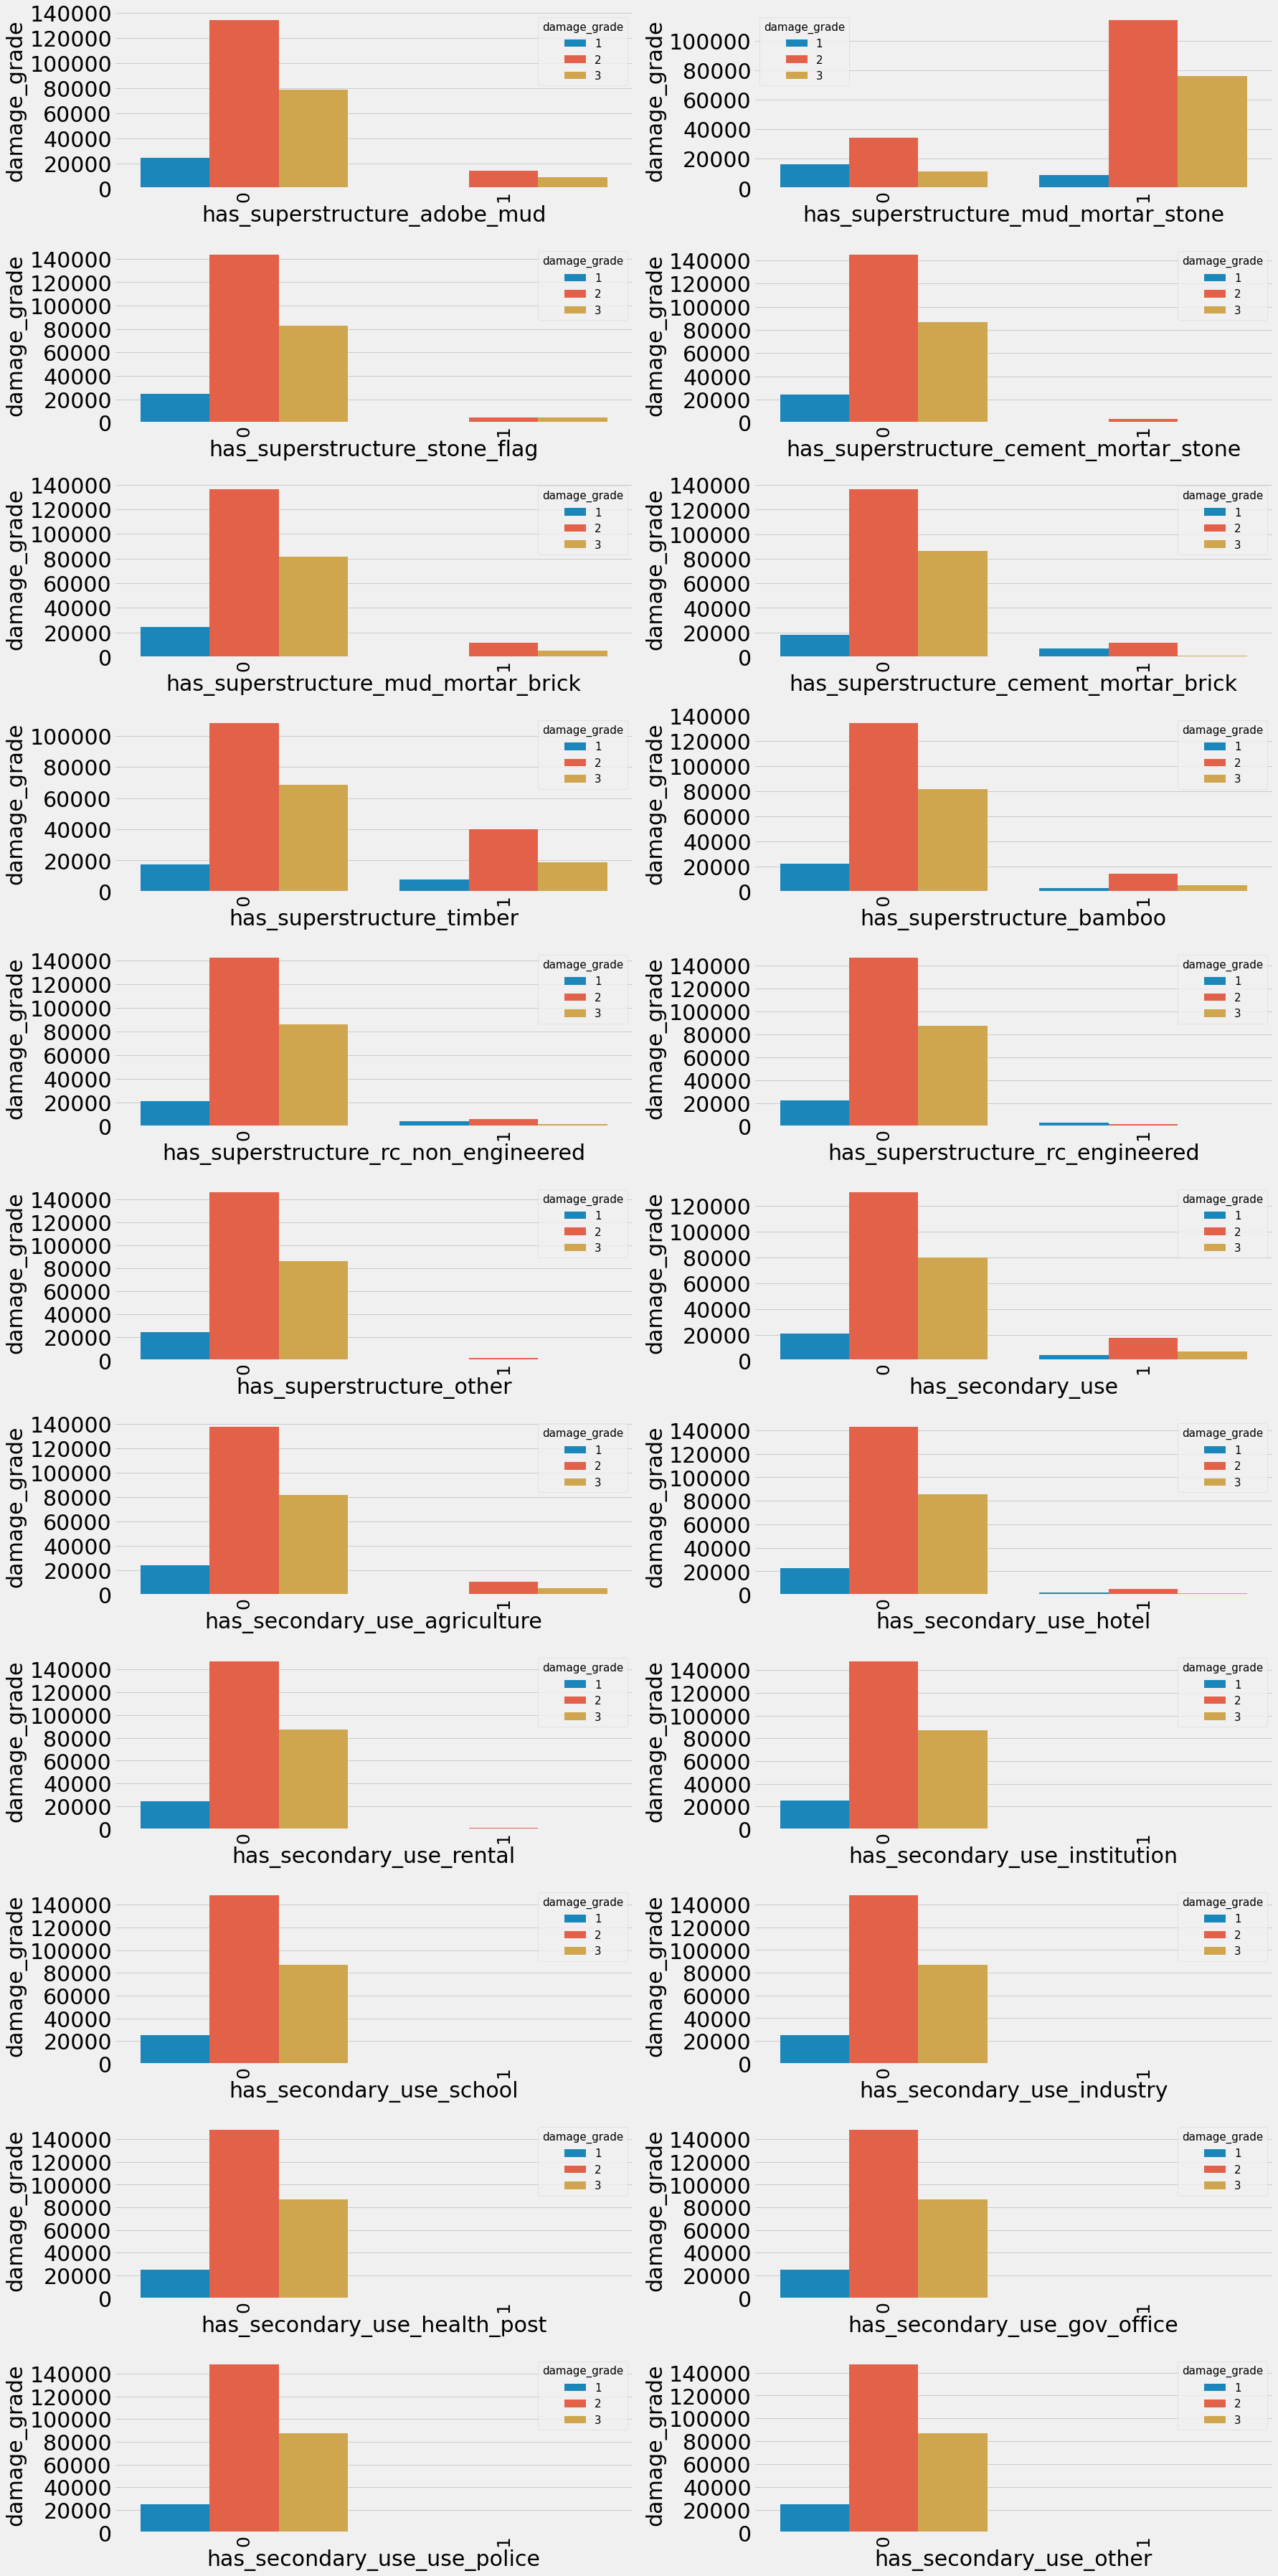

In [32]:
# Bivariate Analysis

plt.figure(figsize=(25,50))
plotnum = 1

for feature in num_to_cat:
    if plotnum<=len(num_to_cat):
        ax = plt.subplot(11,2,plotnum)
        sns.countplot(x=df[feature]
                        ,hue=df.damage_grade)
        plt.xlabel(feature,fontsize=30) 
        plt.ylabel('damage_grade',fontsize=30)
        plt.xticks(fontsize=25,rotation=90)
        plt.yticks(fontsize=30)
    plotnum+=1
plt.tight_layout()

> - We can clearly see that mud structures were much more damaged than more solid ones like cement.
> - Mud mortar stone homes were the worse, being strongly correlated with a higher damage grade, while cement mortar brick were least damaged
> - Most of the building used for secondary purposes were more than moderately damaged.

# Skewness and Kurtosis

In [33]:
for feature in final_num_fe:
    print('{:15}'.format(feature),
          'Skewness: {:05.2f}'.format(df[feature].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(df[feature].kurt())  
         )

count_floors_pre_eq Skewness: 00.83     Kurtosis: 002.32
age             Skewness: 12.19     Kurtosis: 157.25
area_percentage Skewness: 03.53     Kurtosis: 030.44
height_percentage Skewness: 01.81     Kurtosis: 014.32
count_families  Skewness: 01.63     Kurtosis: 017.67


> We will take care of skewness using transformations in the FE Section.

# Outliers

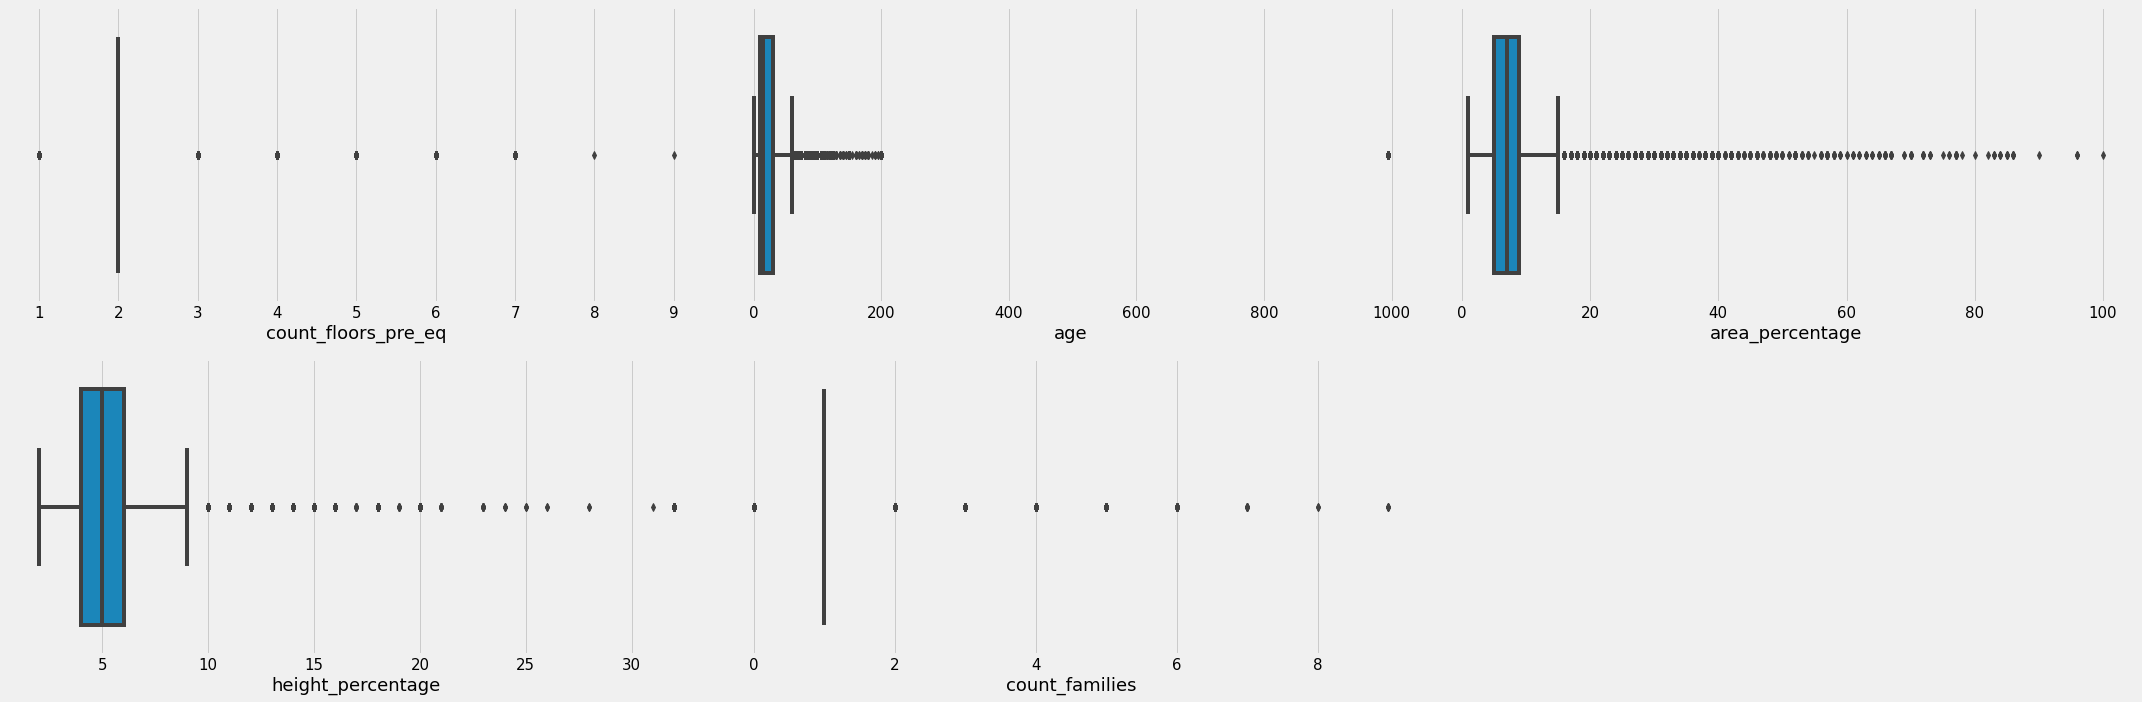

In [34]:
plt.figure(figsize=(30,10))
plotnum=1
for feature in final_num_fe:
    if(plotnum<=6):
        ax=plt.subplot(2,3,plotnum) 
        sns.boxplot(df[feature])
    plotnum+=1
plt.tight_layout()  

> There are outliers present. We will deal with them in the FE Section.

# Heatmap

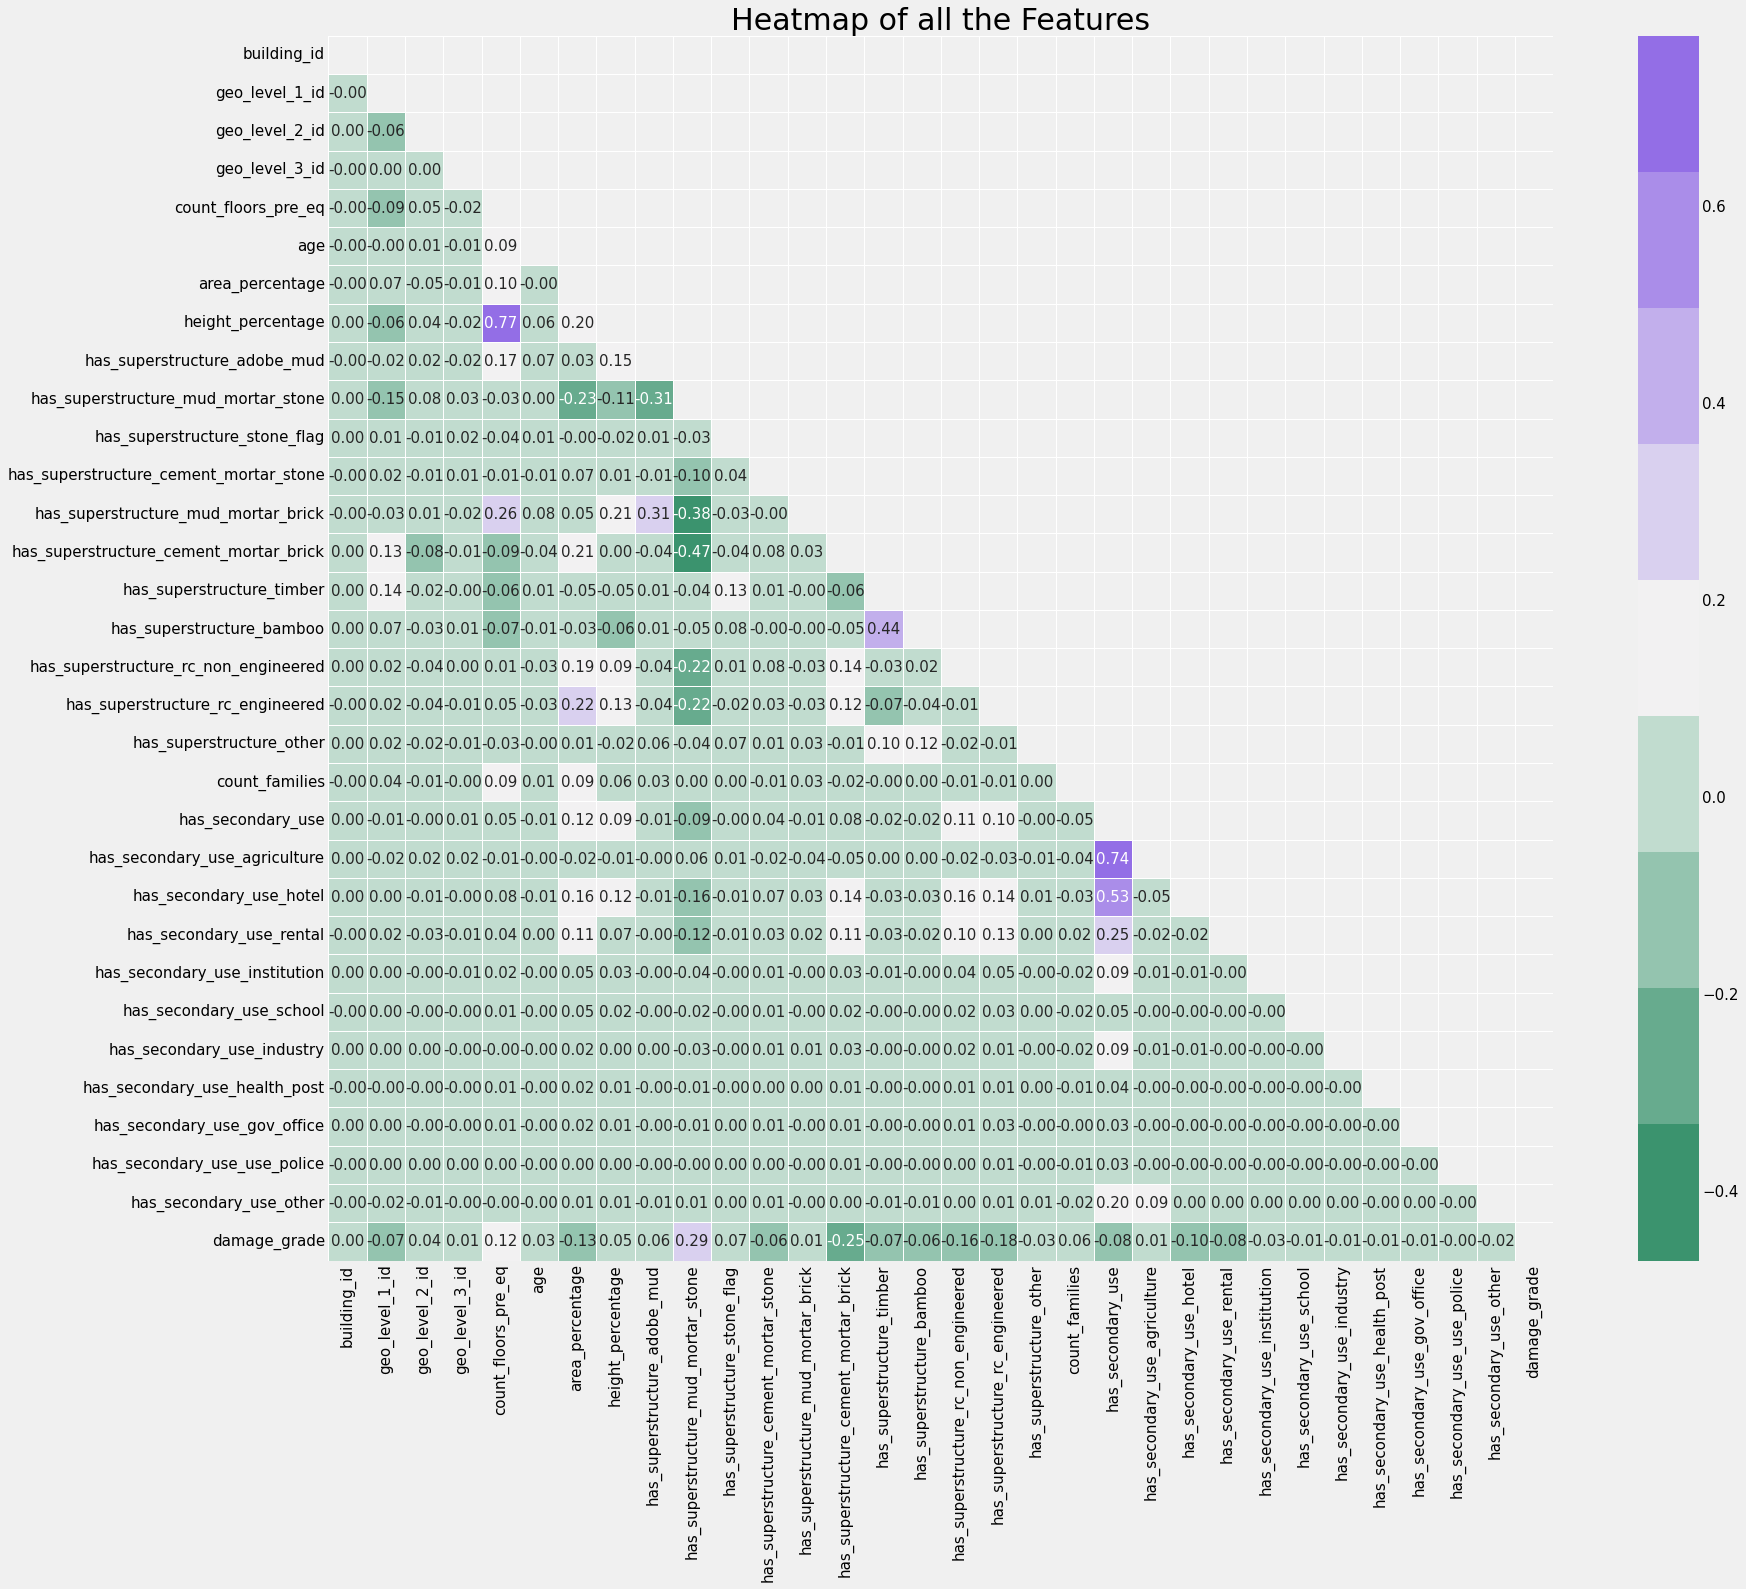

In [35]:
plt.subplots(figsize = (27,21))

# creating mask
mask = np.triu(np.ones_like(df.corr()))

sns.heatmap(df.corr(), 
            cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9), 
            mask = mask, 
            annot=True, 
            square=True, linewidths=.5, fmt='.2f',annot_kws={'size': 15}
           );

plt.title("Heatmap of all the Features", fontsize = 30);

# Correlation with Target Variable

In [36]:
df_corr = df.corr()['damage_grade'].sort_values(ascending=False)

print('Most Positive Correlations:\n', df_corr.head(5))
print('\nMost Negative Correlations:\n', df_corr.tail(5).sort_values(ascending=True))

Most Positive Correlations:
 damage_grade                           1.000000
has_superstructure_mud_mortar_stone    0.291325
count_floors_pre_eq                    0.122308
has_superstructure_stone_flag          0.066039
count_families                         0.056151
Name: damage_grade, dtype: float64

Most Negative Correlations:
 has_superstructure_cement_mortar_brick   -0.254131
has_superstructure_rc_engineered         -0.179014
has_superstructure_rc_non_engineered     -0.158145
area_percentage                          -0.125221
has_secondary_use_hotel                  -0.097942
Name: damage_grade, dtype: float64


> - Highest Correlated Feature to the Target Variable is Vistors_with_Patient with the correlation being 0.29.
> - There is Multicollinearity present in the dataset but the threshold I have set for removing multicollinear variables is 0.8. So no need to remove any features here.
> - Correlation with the Target Variable is not very high for other features. Also there is imbalance, these two might be a
problem when it comes to model performance.

# Feature Engineering

# Outliers

In [37]:
df.loc[(df.age>800),'age']=np.median(df.age)
df.loc[(df.height_percentage>30),'height_percentage']=np.median(df.height_percentage)
df.loc[(df.area_percentage>90),'area_percentage']=np.median(df.area_percentage)

# Encoding

# Label Encoding

In [38]:
df = df.replace({"land_surface_condition" : {"n" : 0, "o" : 1, "t" : 2},
                 "legal_ownership_status" : {"a" : 0,"r" : 1,"v" : 2,"w" : 3},
                 })

# One Hot Encoding

In [39]:
original_columns = list(df.columns)

In [40]:
ohe_fe = [col for col in df.columns if df[col].dtype == 'O']
ohe_fe

['foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration']

In [41]:
df = pd.get_dummies(df, columns= ohe_fe)
df 

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u
0,802906,6,487,12198,2,30,6,5,2,1,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,1,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,2,0,1,0,0,0,0,1,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,2,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,0,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
260597,669485,17,715,2060,2,0,6,5,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,2,0,0,0,0,0,1,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [42]:
new_columns = [c for c in df.columns if c not in original_columns]

# New Features

## Polynomial Features

One simple feature construction method is called polynomial features. In this method, we make features that are powers of existing features as well as interaction terms between existing features. For example, we can create variables count_floors_pre_eq^2 and count_families^2 and also variables such as count_families x count_families, count_families x count_families^2, count_families^2 x count_families^2, and so on. These features that are a combination of multiple individual variables are called interaction terms because they capture the interactions between variables. In other words, while two variables by themselves may not have a strong influence on the target, combining them together into a single interaction variable might show a relationship with the target. Interaction terms are commonly used in statistical models to capture the effects of multiple variables, but I do not see them used as often in machine learning. Nonetheless, we can try out a few to see if they might help our model to predict damage grade.

In the following code, we create polynomial features using few features. Scikit-Learn has a useful class called PolynomialFeatures that creates the polynomials and the interaction terms up to a specified degree. We can use a degree of 3 to see the results (when we are creating polynomial features, we want to avoid using too high of a degree, both because the number of features scales exponentially with the degree, and because we can run into problems with overfitting).

In [43]:
# Make a new dataframe for polynomial features
poly_features = df[['count_floors_pre_eq','height_percentage','count_families','damage_grade']]

poly_target = poly_features['damage_grade']

poly_features = poly_features.drop(columns = ['damage_grade'])

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [44]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (260601, 20)


In [45]:
# Get the first 15 feature names
poly_transformer.get_feature_names(input_features = ['count_floors_pre_eq','height_percentage','count_families'])[:15] 

['1',
 'count_floors_pre_eq',
 'height_percentage',
 'count_families',
 'count_floors_pre_eq^2',
 'count_floors_pre_eq height_percentage',
 'count_floors_pre_eq count_families',
 'height_percentage^2',
 'height_percentage count_families',
 'count_families^2',
 'count_floors_pre_eq^3',
 'count_floors_pre_eq^2 height_percentage',
 'count_floors_pre_eq^2 count_families',
 'count_floors_pre_eq height_percentage^2',
 'count_floors_pre_eq height_percentage count_families']

In [46]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, columns = poly_transformer.get_feature_names(['count_floors_pre_eq','height_percentage','count_families'])) 

# Add in the target
poly_features['damage_grade'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['damage_grade'].sort_values()

In [47]:
poly_corrs

height_percentage^3                                    -0.026430
count_floors_pre_eq height_percentage^2                -0.004846
height_percentage^2                                     0.004756
count_families^3                                        0.007066
count_floors_pre_eq^2 height_percentage                 0.022640
height_percentage count_families^2                      0.023643
count_families^2                                        0.025707
height_percentage^2 count_families                      0.030203
height_percentage                                       0.044455
count_floors_pre_eq count_families^2                    0.045907
count_floors_pre_eq^3                                   0.047919
count_floors_pre_eq height_percentage                   0.048573
count_families                                          0.056151
count_floors_pre_eq height_percentage count_families    0.063165
height_percentage count_families                        0.064657
count_floors_pre_eq^2    

In [48]:
poly_corrs.isnull().sum()

1

In [49]:
poly_features

,1,count_floors_pre_eq,height_percentage,count_families,count_floors_pre_eq^2,count_floors_pre_eq height_percentage,count_floors_pre_eq count_families,height_percentage^2,height_percentage count_families,count_families^2,count_floors_pre_eq^3,count_floors_pre_eq^2 height_percentage,count_floors_pre_eq^2 count_families,count_floors_pre_eq height_percentage^2,count_floors_pre_eq height_percentage count_families,count_floors_pre_eq count_families^2,height_percentage^3,height_percentage^2 count_families,height_percentage count_families^2,count_families^3,damage_grade
0,1.0,2.0,5.0,1.0,4.0,10.0,2.0,25.0,5.0,1.0,8.0,20.0,4.0,50.0,10.0,2.0,125.0,25.0,5.0,1.0,3
1,1.0,2.0,7.0,1.0,4.0,14.0,2.0,49.0,7.0,1.0,8.0,28.0,4.0,98.0,14.0,2.0,343.0,49.0,7.0,1.0,2
2,1.0,2.0,5.0,1.0,4.0,10.0,2.0,25.0,5.0,1.0,8.0,20.0,4.0,50.0,10.0,2.0,125.0,25.0,5.0,1.0,3
3,1.0,2.0,5.0,1.0,4.0,10.0,2.0,25.0,5.0,1.0,8.0,20.0,4.0,50.0,10.0,2.0,125.0,25.0,5.0,1.0,2
4,1.0,3.0,9.0,1.0,9.0,27.0,3.0,81.0,9.0,1.0,27.0,81.0,9.0,243.0,27.0,3.0,729.0,81.0,9.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,1.0,1.0,3.0,1.0,1.0,3.0,1.0,9.0,3.0,1.0,1.0,3.0,1.0,9.0,3.0,1.0,27.0,9.0,3.0,1.0,2
260597,1.0,2.0,5.0,1.0,4.0,10.0,2.0,25.0,5.0,1.0,8.0,20.0,4.0,50.0,10.0,2.0,125.0,25.0,5.0,1.0,3
260598,1.0,3.0,7.0,1.0,9.0,21.0,3.0,49.0,7.0,1.0,27.0,63.0,9.0,147.0,21.0,3.0,343.0,49.0,7.0,1.0,3
260599,1.0,2.0,6.0,1.0,4.0,12.0,2.0,36.0,6.0,1.0,8.0,24.0,4.0,72.0,12.0,2.0,216.0,36.0,6.0,1.0,2


In [50]:
poly_features=poly_features.drop(columns=['damage_grade','1','count_floors_pre_eq','count_floors_pre_eq^2','count_floors_pre_eq^3',
                            'height_percentage','height_percentage^2','height_percentage^3',
                            'count_families','count_families^2','count_families^3'])

In [51]:
poly_features

,count_floors_pre_eq height_percentage,count_floors_pre_eq count_families,height_percentage count_families,count_floors_pre_eq^2 height_percentage,count_floors_pre_eq^2 count_families,count_floors_pre_eq height_percentage^2,count_floors_pre_eq height_percentage count_families,count_floors_pre_eq count_families^2,height_percentage^2 count_families,height_percentage count_families^2
0,10.0,2.0,5.0,20.0,4.0,50.0,10.0,2.0,25.0,5.0
1,14.0,2.0,7.0,28.0,4.0,98.0,14.0,2.0,49.0,7.0
2,10.0,2.0,5.0,20.0,4.0,50.0,10.0,2.0,25.0,5.0
3,10.0,2.0,5.0,20.0,4.0,50.0,10.0,2.0,25.0,5.0
4,27.0,3.0,9.0,81.0,9.0,243.0,27.0,3.0,81.0,9.0
...,...,...,...,...,...,...,...,...,...,...
260596,3.0,1.0,3.0,3.0,1.0,9.0,3.0,1.0,9.0,3.0
260597,10.0,2.0,5.0,20.0,4.0,50.0,10.0,2.0,25.0,5.0
260598,21.0,3.0,7.0,63.0,9.0,147.0,21.0,3.0,49.0,7.0
260599,12.0,2.0,6.0,24.0,4.0,72.0,12.0,2.0,36.0,6.0


In [52]:
poly_features['building_id'] = df['building_id']

In [53]:
pd.set_option('display.max_rows',None)

In [54]:
poly_features.std() 

count_floors_pre_eq height_percentage                        8.901767
count_floors_pre_eq count_families                           1.319106
height_percentage count_families                             3.346039
count_floors_pre_eq^2 height_percentage                     41.734498
count_floors_pre_eq^2 count_families                         5.164849
count_floors_pre_eq height_percentage^2                    113.218187
count_floors_pre_eq height_percentage count_families        12.506670
count_floors_pre_eq count_families^2                         3.896824
height_percentage^2 count_families                          34.421772
height_percentage count_families^2                          10.052910
building_id                                             304544.999032
dtype: float64

In [55]:
pd.reset_option('display.max_rows') 

In [56]:
poly_features.isnull().sum().sum()

0

## Aggregations and Groupby

In [57]:
df_agg = {"land_surface_condition":['mean','sum'],"legal_ownership_status":['mean','sum']} 

for col in final_num_fe:
    df_agg[col] = ['min','max','mean','sum']
    
for col in new_columns:
    df_agg[col] = ['mean','sum']

In [58]:
grpby = df.groupby(['geo_level_1_id','geo_level_2_id','geo_level_3_id']).agg(df_agg) 
grpby

land_surface_condition      \
                                                               mean sum   
geo_level_1_id geo_level_2_id geo_level_3_id                              
0              62             1418                         2.000000   4   
                              3149                         2.000000   6   
                              3181                         2.000000  14   
                              4066                         2.000000   8   
                              5354                         2.000000  12   
...                                                             ...  ..   
30             1391           8191                         1.833333  11   
                              9788                         2.000000  12   
                              10129                        2.000000   2   
                              10950                        2.000000  16   
                              11638                        2.000000   2   

                                             legal_ownership_status      \
                                                               mean sum   
geo_level_1_id geo_level_2_id geo_level_3_id                              
0              62             1418                              2.0   4   
                              3149                              2.0   6   
                              3181                              2.0  14   
                              4066                              2.0   8   
                              5354                              2.0  12   
...                                                             ...  ..   
30             1391           8191                              2.0  12   
                              9788                              2.0  12   
                              10129                             2.0   2   
                              10950                             2.0  16   
                              11638                             2.0   2   

                                             count_floors_pre_eq      \
                                                             min max   
geo_level_1_id geo_level_2_id geo_level_3_id                           
0              62             1418                             2   2   
                              3149                             2   3   
                              3181                             1   3   
                              4066                             2   3   
                              5354                             2   3   
...                                                          ...  ..   
30             1391           8191                             1   2   
                              9788                             1   2   
                              10129                            2   2   
                              10950                            1   2   
                              11638                            2   2   

                                                           age       \
                                                  mean sum min  max   
geo_level_1_id geo_level_2_id geo_level_3_id                          
0              62             1418            2.000000   4   0   35   
                              3149            2.333333   7  15   25   
                              3181            2.142857  15   0   40   
                              4066            2.250000   9   5   20   
                              5354            2.166667  13  10   30   
...                                                ...  ..  ..  ...   
30             1391           8191            1.500000   9   5   30   
                              9788            1.666667  10  10   80   
                              10129           2.000000   2  85   85   
                              10950           1.875000  15  10  100   
           

In [59]:
# Renaming Columns
grpby.columns = pd.Index(['geo_level_ids_'+e[0] + "_" + e[1].upper() for e in grpby.columns.tolist()])
grpby

geo_level_ids_land_surface_condition_MEAN  \
geo_level_1_id geo_level_2_id geo_level_3_id                                              
0              62             1418                                             2.000000   
                              3149                                             2.000000   
                              3181                                             2.000000   
                              4066                                             2.000000   
                              5354                                             2.000000   
...                                                                                 ...   
30             1391           8191                                             1.833333   
                              9788                                             2.000000   
                              10129                                            2.000000   
                              10950                                            2.000000   
                              11638                                            2.000000   

                                              geo_level_ids_land_surface_condition_SUM  \
geo_level_1_id geo_level_2_id geo_level_3_id                                             
0              62             1418                                                   4   
                              3149                                                   6   
                              3181                                                  14   
                              4066                                                   8   
                              5354                                                  12   
...                                                                                ...   
30             1391           8191                                                  11   
                              9788                                                  12   
                              10129                                                  2   
                              10950                                                 16   
                              11638                                                  2   

                                              geo_level_ids_legal_ownership_status_MEAN  \
geo_level_1_id geo_level_2_id geo_level_3_id                                              
0              62             1418                                                  2.0   
                              3149                                                  2.0   
                              3181                                                  2.0   
                              4066                                                  2.0   
                              5354                                                  2.0   
...                                                                                 ...   
30             1391           8191                                                  2.0   
                              9788                                                  2.0   
                              10129                                                 2.0   
                              10950                                                 2.0   
                              11638                                                 2.0   

                                              geo_level_ids_legal_ownership_status_SUM  \
geo_level_1_id geo_level_2_id geo_level_3_id                                             
0              62             1418                                                   4   
                              3149                                                   6   
                              3181                                                  14   
                              4066                       

In [60]:
# Remove duplicate columns by values
_, idx = np.unique(grpby, axis = 1, return_index = True)
grpby = grpby.iloc[:, idx]
grpby

geo_level_ids_plan_configuration_f_MEAN  \
geo_level_1_id geo_level_2_id geo_level_3_id                                            
0              62             1418                                                0.0   
                              3149                                                0.0   
                              3181                                                0.0   
                              4066                                                0.0   
                              5354                                                0.0   
...                                                                               ...   
30             1391           8191                                                0.0   
                              9788                                                0.0   
                              10129                                               0.0   
                              10950                                               0.0   
                              11638                                               0.0   

                                              geo_level_ids_plan_configuration_f_SUM  \
geo_level_1_id geo_level_2_id geo_level_3_id                                           
0              62             1418                                                 0   
                              3149                                                 0   
                              3181                                                 0   
                              4066                                                 0   
                              5354                                                 0   
...                                                                              ...   
30             1391           8191                                                 0   
                              9788                                                 0   
                              10129                                                0   
                              10950                                                0   
                              11638                                                0   

                                              geo_level_ids_plan_configuration_n_MEAN  \
geo_level_1_id geo_level_2_id geo_level_3_id                                            
0              62             1418                                                0.0   
                              3149                                                0.0   
                              3181                                                0.0   
                              4066                                                0.0   
                              5354                                                0.0   
...                                                                               ...   
30             1391           8191                                                0.0   
                              9788                                                0.0   
                              10129                                               0.0   
                              10950                                               0.0   
                              11638                                               0.0   

                                              geo_level_ids_plan_configuration_n_SUM  \
geo_level_1_id geo_level_2_id geo_level_3_id                                           
0              62             1418                                                 0   
                              3149                                                 0   
                              3181                                                 0   
                              4066                                                 0   
                              5354                       

In [61]:
pd.set_option('display.max_rows',None)

In [62]:
grpby.std() 

geo_level_ids_plan_configuration_f_MEAN        0.001969
geo_level_ids_plan_configuration_f_SUM         0.043519
geo_level_ids_plan_configuration_n_MEAN        0.002610
geo_level_ids_plan_configuration_n_SUM         0.058646
geo_level_ids_position_o_MEAN                  0.031714
geo_level_ids_position_o_SUM                   2.347094
geo_level_ids_ground_floor_type_z_MEAN         0.052905
geo_level_ids_ground_floor_type_z_SUM          0.991906
geo_level_ids_plan_configuration_s_MEAN        0.024058
geo_level_ids_plan_configuration_s_SUM         0.218135
geo_level_ids_plan_configuration_c_MEAN        0.011985
geo_level_ids_plan_configuration_c_SUM         0.316022
geo_level_ids_plan_configuration_o_MEAN        0.004727
geo_level_ids_plan_configuration_o_SUM         0.134205
geo_level_ids_foundation_type_h_MEAN           0.054290
geo_level_ids_foundation_type_h_SUM            1.502318
geo_level_ids_foundation_type_w_MEAN           0.143387
geo_level_ids_foundation_type_w_SUM            7

In [63]:
pd.reset_option('display.max_rows') 

In [64]:
grpby.isnull().sum().sum()

0

## Merging

In [65]:
# creating 2 new features
df['fam_per_floor'] = df['count_families']/df['count_floors_pre_eq']
df['height_perc_per_floor'] = df['height_percentage']/df['count_floors_pre_eq']

In [66]:
# Merge polynomial features into main dataframe
df = pd.merge(df,poly_features, on = 'building_id', how = 'left')
df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,fam_per_floor,height_perc_per_floor,count_floors_pre_eq height_percentage,count_floors_pre_eq count_families,height_percentage count_families,count_floors_pre_eq^2 height_percentage,count_floors_pre_eq^2 count_families,count_floors_pre_eq height_percentage^2,count_floors_pre_eq height_percentage count_families,count_floors_pre_eq count_families^2,height_percentage^2 count_families,height_percentage count_families^2
0,802906,6,487,12198,2,30,6,5,2,1,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0.500000,2.500000,10.0,2.0,5.0,20.0,4.0,50.0,10.0,2.0,25.0,5.0
1,28830,8,900,2812,2,10,8,7,1,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0.500000,3.500000,14.0,2.0,7.0,28.0,4.0,98.0,14.0,2.0,49.0,7.0
2,94947,21,363,8973,2,10,5,5,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0.500000,2.500000,10.0,2.0,5.0,20.0,4.0,50.0,10.0,2.0,25.0,5.0
3,590882,22,418,10694,2,10,6,5,2,0,1,0,0,0,0,1,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0.500000,2.500000,10.0,2.0,5.0,20.0,4.0,50.0,10.0,2.0,25.0,5.0
4,201944,11,131,1488,3,30,8,9,2,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0.333333,3.000000,27.0,3.0,9.0,81.0,9.0,243.0,27.0,3.0,81.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,0,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1.000000,3.000000,3.0,1.0,3.0,3.0,1.0,9.0,3.0,1.0,9.0,3.0
260597,669485,17,715,2060,2,0,6,5,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0.500000,2.500000,10.0,2.0,5.0,20.0,4.0,50.0,10.0,2.0,25.0,5.0
260598,602512,17,51,8163,3,55,6,7,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0.333333,2.333333,21.0,3.0,7.0,63.0,9.0,147.0,21.0,3.0,49.0,7.0
260599,151409,26,39,1851,2,10,14,6,2,0,0,0,0,0,1,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.500000,3.000000,12.0,2.0,6.0,24.0,4.0,72.0,12.0,2.0,36.0,6.0

In [67]:
# Merge aggregated groupby features into main dataframe
df = pd.merge(df,grpby, on = ['geo_level_1_id','geo_level_2_id','geo_level_3_id'], how = 'left')
df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,fam_per_floor,height_perc_per_floor,count_floors_pre_eq height_percentage,count_floors_pre_eq count_families,height_percentage count_families,count_floors_pre_eq^2 height_percentage,count_floors_pre_eq^2 count_families,count_floors_pre_eq height_percentage^2,count_floors_pre_eq height_percentage count_families,count_floors_pre_eq count_families^2,height_percentage^2 count_families,height_percentage count_families^2,geo_level_ids_plan_configuration_f_MEAN,geo_level_ids_plan_configuration_f_SUM,geo_level_ids_plan_configuration_n_MEAN,geo_level_ids_plan_configuration_n_SUM,geo_level_ids_position_o_MEAN,geo_level_ids_position_o_SUM,geo_level_ids_ground_floor_type_z_MEAN,geo_level_ids_ground_floor_type_z_SUM,geo_level_ids_plan_configuration_s_MEAN,geo_level_ids_plan_configuration_s_SUM,geo_level_ids_plan_configuration_c_MEAN,geo_level_ids_plan_configuration_c_SUM,geo_level_ids_plan_configuration_o_MEAN,geo_level_ids_plan_configuration_o_SUM,geo_level_ids_foundation_type_h_MEAN,geo_level_ids_foundation_type_h_SUM,geo_level_ids_foundation_type_w_MEAN,geo_level_ids_foundation_type_w_SUM,geo_level_ids_plan_configuration_m_MEAN,geo_level_ids_plan_configuration_m_SUM,geo_level_ids_plan_configuration_q_MEAN,geo_level_ids_plan_configuration_q_SUM,geo_level_ids_ground_floor_type_m_MEAN,geo_level_ids_ground_floor_type_m_SUM,geo_level_ids_ground_floor_type_x_MEAN,geo_level_ids_ground_floor_type_x_SUM,geo_level_ids_roof_type_x_MEAN,geo_level_ids_other_floor_type_s_MEAN,geo_level_ids_roof_type_x_SUM,geo_level_ids_other_floor_type_s_SUM,geo_level_ids_foundation_type_i_MEAN,geo_level_ids_foundation_type_i_SUM,geo_level_ids_plan_configuration_a_MEAN,geo_level_ids_plan_configuration_a_SUM,geo_level_ids_plan_configuration_u_MEAN,geo_level_ids_plan_configuration_u_SUM,geo_level_ids_position_t_MEAN,geo_level_ids_position_t_SUM,geo_level_ids_roof_type_q_MEAN,geo_level_ids_ground_floor_type_v_MEAN,geo_level_ids_position_j_MEAN,geo_level_ids_roof_type_q_SUM,geo_level_ids_ground_floor_type_v_SUM,geo_level_ids_position_j_SUM,geo_level_ids_other_floor_type_j_MEAN,geo_level_ids_other_floor_type_j_SUM,geo_level_ids_age_MIN,geo_level_ids_other_floor_type_x_MEAN,geo_level_ids_foundation_type_u_MEAN,geo_level_ids_other_floor_type_q_MEAN,geo_level_ids_foundation_type_r_MEAN,geo_level_ids_other_floor_type_x_SUM,geo_level_ids_foundation_type_u_SUM,geo_level_ids_position_s_MEAN,geo_level_ids_ground_floor_type_f_MEAN,geo_level_ids_roof_type_n_MEAN,geo_level_ids_plan_configuration_d_MEAN,geo_level_ids_count_families_MIN,geo_level_ids_count_families_MEAN,geo_level_ids_count_families_MAX,geo_level_ids_ot

# Log Transformation

In [68]:
# final numerical features list to transform and scale
num_transform = []
num_transform.append(geo_id)
num_transform.append(final_num_fe)
num_transform.append(list(poly_features.columns)) 
num_transform.append(list(grpby.columns))

In [69]:
num_transform

[['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id'],
 ['count_floors_pre_eq',
  'age',
  'area_percentage',
  'height_percentage',
  'count_families'],
 ['count_floors_pre_eq height_percentage',
  'count_floors_pre_eq count_families',
  'height_percentage count_families',
  'count_floors_pre_eq^2 height_percentage',
  'count_floors_pre_eq^2 count_families',
  'count_floors_pre_eq height_percentage^2',
  'count_floors_pre_eq height_percentage count_families',
  'count_floors_pre_eq count_families^2',
  'height_percentage^2 count_families',
  'height_percentage count_families^2',
  'building_id'],
 ['geo_level_ids_plan_configuration_f_MEAN',
  'geo_level_ids_plan_configuration_f_SUM',
  'geo_level_ids_plan_configuration_n_MEAN',
  'geo_level_ids_plan_configuration_n_SUM',
  'geo_level_ids_position_o_MEAN',
  'geo_level_ids_position_o_SUM',
  'geo_level_ids_ground_floor_type_z_MEAN',
  'geo_level_ids_ground_floor_type_z_SUM',
  'geo_level_ids_plan_configuration_s_MEAN',
  'geo_level_i

In [70]:
# flattening a 2d list into 1d list
num_transform = list(np.concatenate(num_transform).flat)
num_transform

['geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'count_families',
 'count_floors_pre_eq height_percentage',
 'count_floors_pre_eq count_families',
 'height_percentage count_families',
 'count_floors_pre_eq^2 height_percentage',
 'count_floors_pre_eq^2 count_families',
 'count_floors_pre_eq height_percentage^2',
 'count_floors_pre_eq height_percentage count_families',
 'count_floors_pre_eq count_families^2',
 'height_percentage^2 count_families',
 'height_percentage count_families^2',
 'building_id',
 'geo_level_ids_plan_configuration_f_MEAN',
 'geo_level_ids_plan_configuration_f_SUM',
 'geo_level_ids_plan_configuration_n_MEAN',
 'geo_level_ids_plan_configuration_n_SUM',
 'geo_level_ids_position_o_MEAN',
 'geo_level_ids_position_o_SUM',
 'geo_level_ids_ground_floor_type_z_MEAN',
 'geo_level_ids_ground_floor_type_z_SUM',
 'geo_level_ids_plan_configuration_s_MEAN',
 'geo_level_ids_plan_configuration_s_SUM'

In [71]:
num_transform.remove('building_id')

In [72]:
# We will do Log transform of the skewed numerical features to lessen impact of outliers
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
from scipy.stats import skew
skewness = df[num_transform].apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
print(skewness)

101 skewed numerical features to log transform
count_floors_pre_eq                    0.834108
age                                    2.054321
area_percentage                        3.431613
height_percentage                      1.140826
count_families                         1.634748
                                         ...   
geo_level_ids_height_percentage_SUM    3.952171
geo_level_ids_age_MEAN                 2.465681
geo_level_ids_area_percentage_SUM      7.057333
geo_level_ids_age_MAX                  1.492581
geo_level_ids_age_SUM                  3.016608
Length: 101, dtype: float64


In [73]:
skewed_features = skewness.index
df[skewed_features] = np.log1p(df[skewed_features])

In [74]:
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,fam_per_floor,height_perc_per_floor,count_floors_pre_eq height_percentage,count_floors_pre_eq count_families,height_percentage count_families,count_floors_pre_eq^2 height_percentage,count_floors_pre_eq^2 count_families,count_floors_pre_eq height_percentage^2,count_floors_pre_eq height_percentage count_families,count_floors_pre_eq count_families^2,height_percentage^2 count_families,height_percentage count_families^2,geo_level_ids_plan_configuration_f_MEAN,geo_level_ids_plan_configuration_f_SUM,geo_level_ids_plan_configuration_n_MEAN,geo_level_ids_plan_configuration_n_SUM,geo_level_ids_position_o_MEAN,geo_level_ids_position_o_SUM,geo_level_ids_ground_floor_type_z_MEAN,geo_level_ids_ground_floor_type_z_SUM,geo_level_ids_plan_configuration_s_MEAN,geo_level_ids_plan_configuration_s_SUM,geo_level_ids_plan_configuration_c_MEAN,geo_level_ids_plan_configuration_c_SUM,geo_level_ids_plan_configuration_o_MEAN,geo_level_ids_plan_configuration_o_SUM,geo_level_ids_foundation_type_h_MEAN,geo_level_ids_foundation_type_h_SUM,geo_level_ids_foundation_type_w_MEAN,geo_level_ids_foundation_type_w_SUM,geo_level_ids_plan_configuration_m_MEAN,geo_level_ids_plan_configuration_m_SUM,geo_level_ids_plan_configuration_q_MEAN,geo_level_ids_plan_configuration_q_SUM,geo_level_ids_ground_floor_type_m_MEAN,geo_level_ids_ground_floor_type_m_SUM,geo_level_ids_ground_floor_type_x_MEAN,geo_level_ids_ground_floor_type_x_SUM,geo_level_ids_roof_type_x_MEAN,geo_level_ids_other_floor_type_s_MEAN,geo_level_ids_roof_type_x_SUM,geo_level_ids_other_floor_type_s_SUM,geo_level_ids_foundation_type_i_MEAN,geo_level_ids_foundation_type_i_SUM,geo_level_ids_plan_configuration_a_MEAN,geo_level_ids_plan_configuration_a_SUM,geo_level_ids_plan_configuration_u_MEAN,geo_level_ids_plan_configuration_u_SUM,geo_level_ids_position_t_MEAN,geo_level_ids_position_t_SUM,geo_level_ids_roof_type_q_MEAN,geo_level_ids_ground_floor_type_v_MEAN,geo_level_ids_position_j_MEAN,geo_level_ids_roof_type_q_SUM,geo_level_ids_ground_floor_type_v_SUM,geo_level_ids_position_j_SUM,geo_level_ids_other_floor_type_j_MEAN,geo_level_ids_other_floor_type_j_SUM,geo_level_ids_age_MIN,geo_level_ids_other_floor_type_x_MEAN,geo_level_ids_foundation_type_u_MEAN,geo_level_ids_other_floor_type_q_MEAN,geo_level_ids_foundation_type_r_MEAN,geo_level_ids_other_floor_type_x_SUM,geo_level_ids_foundation_type_u_SUM,geo_level_ids_position_s_MEAN,geo_level_ids_ground_floor_type_f_MEAN,geo_level_ids_roof_type_n_MEAN,geo_level_ids_plan_configuration_d_MEAN,geo_level_ids_count_families_MIN,geo_level_ids_count_families_MEAN,geo_level_ids_count_families_MAX,geo_level_ids_ot

# Final Checks

In [75]:
pd.set_option('display.max_rows',None) 

In [76]:
df.std() 

building_id                                             304544.999032
geo_level_1_id                                               8.033617
geo_level_2_id                                             412.710734
geo_level_3_id                                            3646.369645
count_floors_pre_eq                                          0.230703
age                                                          1.112811
area_percentage                                              0.402771
height_percentage                                            0.286955
land_surface_condition                                       0.696040
has_superstructure_adobe_mud                                 0.284231
has_superstructure_mud_mortar_stone                          0.425900
has_superstructure_stone_flag                                0.182081
has_superstructure_cement_mortar_stone                       0.133800
has_superstructure_mud_mortar_brick                          0.252010
has_superstructure_c

In [77]:
pd.reset_option('display.max_rows') 

In [78]:
# drop constant features
drop = ['geo_level_ids_position_o_SUM','geo_level_ids_foundation_type_w_SUM',
        'geo_level_ids_plan_configuration_q_SUM','geo_level_ids_ground_floor_type_x_SUM',
        'geo_level_ids_plan_configuration_u_SUM','geo_level_ids_position_t_SUM',
        'geo_level_ids_position_j_SUM','geo_level_ids_other_floor_type_x_SUM',
        'geo_level_ids_other_floor_type_q_SUM','geo_level_ids_foundation_type_r_SUM',
        'geo_level_ids_ground_floor_type_f_SUM']
df = df.drop(columns=drop)

In [79]:
df.isnull().sum().sum()

0

In [80]:
df.duplicated().sum()

0

# Memory Reduction

In [81]:
X = df.drop(columns=['building_id','damage_grade'])
y = df.damage_grade
y = y.replace({1:0,2:1,3:2})

In [82]:
import gc
gc.enable()
del poly_features,grpby
gc.collect()

0

In [83]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [84]:
X = reduce_mem_usage(X)

Memory usage of dataframe is 231.38 MB
Memory usage after optimization is: 70.33 MB
Decreased by 69.6%


# Saving Files

In [85]:
# X.to_csv('X.csv',index=False)

In [86]:
# y.to_csv('y.csv',index=False)

# Train Test Split

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# Scaling

In [88]:
scale_transform = [feature for feature in num_transform if feature not in drop]

In [89]:
from sklearn.preprocessing import StandardScaler
# Standardizing numerical features
sc = StandardScaler()
X_train.loc[:, scale_transform] = sc.fit_transform(X_train.loc[:, scale_transform]) 
X_test.loc[:, scale_transform] = sc.transform(X_test.loc[:, scale_transform])

In [90]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208480 entries, 170377 to 121958
Columns: 150 entries, geo_level_1_id to geo_level_ids_age_SUM
dtypes: float16(33), float64(93), int8(24)
memory usage: 167.4 MB


In [91]:
X_test.shape

(52121, 150)

In [92]:
X_train = reduce_mem_usage(X_train)

Memory usage of dataframe is 167.41 MB
Memory usage after optimization is: 56.47 MB
Decreased by 66.3%


In [93]:
X_test = reduce_mem_usage(X_test)

Memory usage of dataframe is 41.85 MB
Memory usage after optimization is: 14.12 MB
Decreased by 66.3%


In [94]:
# Removing Unwanted Characters 
import re
X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

# Feature Selection

In [95]:
from lightgbm import LGBMClassifier
# Initialize an empty array to hold feature importances
feature_importances = np.zeros(X_train.shape[1])

# Create the model with several hyperparameters, we will be using light gbm model with boosting_type 'goss' because of its speed
model_for_fi = LGBMClassifier(objective='multiclass', num_classes =3 ,boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')

In [96]:
# Fit the model twice to avoid overfitting 
for i in range(2):
    
    # Split into training and validation set
    train_features, valid_features, train_target, valid_target = train_test_split(X_train, y_train, test_size = 0.15, random_state = i)
    
    # Train using early stopping
    model_for_fi.fit(train_features, train_target, early_stopping_rounds=100, eval_set = [(valid_features, valid_target)], 
              eval_metric = 'auc_mu', verbose = 200) 
    
    # Record the feature importances
    feature_importances += model_for_fi.feature_importances_

[200]	valid_0's auc_mu: 0.911739	valid_0's multi_logloss: 0.688002
[400]	valid_0's auc_mu: 0.915901	valid_0's multi_logloss: 0.662873
[600]	valid_0's auc_mu: 0.916747	valid_0's multi_logloss: 0.651999
[200]	valid_0's auc_mu: 0.910543	valid_0's multi_logloss: 0.68754
[400]	valid_0's auc_mu: 0.914463	valid_0's multi_logloss: 0.663179
[600]	valid_0's auc_mu: 0.915529	valid_0's multi_logloss: 0.651912


In [97]:
# Make sure to average feature importances! 
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(X_train.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)
feature_importances.head()

,feature,importance
1,geo_level_2_id,2366.0
5,area_percentage,1965.0
0,geo_level_1_id,1838.0
125,geo_level_ids_count_families_MEAN,1820.5
2,geo_level_3_id,1699.5


In [98]:
# Find the features with zero importance
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail()

There are 4 features with 0.0 importance


,feature,importance
29,has_secondary_use_gov_office,0.5
58,plan_configuration_n,0.0
76,geo_level_ids_plan_configuration_f_SUM,0.0
56,plan_configuration_f,0.0
30,has_secondary_use_use_police,0.0


In [99]:
def plot_feature_importances(df,n = 15,threshold = 0.9):

    plt.rcParams['font.size'] = 18
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    plt.rcParams['font.size'] = 12
    
    # Bar plot of n most important features
    df.loc[:n, :].plot.barh(y = 'importance_normalized', 
                            x = 'feature', color = 'blue', edgecolor = 'k', figsize = (12, 8),
                            legend = False)

    plt.xlabel('Normalized Importance', size = 18); plt.ylabel(''); 
    plt.title(f'Top {n} Most Important Features', size = 18)
    plt.gca().invert_yaxis()
    
    return df

,index,feature,importance,importance_normalized,cumulative_importance
0,1,geo_level_2_id,2366.0,0.041044,0.041044
1,5,area_percentage,1965.0,0.034088,0.075132
2,0,geo_level_1_id,1838.0,0.031885,0.107017
3,125,geo_level_ids_count_families_MEAN,1820.5,0.031581,0.138598
4,2,geo_level_3_id,1699.5,0.029482,0.168080
5,4,age,1636.0,0.028381,0.196461
6,143,geo_level_ids_area_percentage_MEAN,1564.5,0.027140,0.223601
7,146,geo_level_ids_age_MEAN,1498.5,0.025995,0.249597
8,140,geo_level_ids_height_percentage_MEAN,1493.0,0.025900,0.275497
9,130,geo_level_ids_count_floors_pre_eq_MEAN,1271.5,0.022057,0.297554


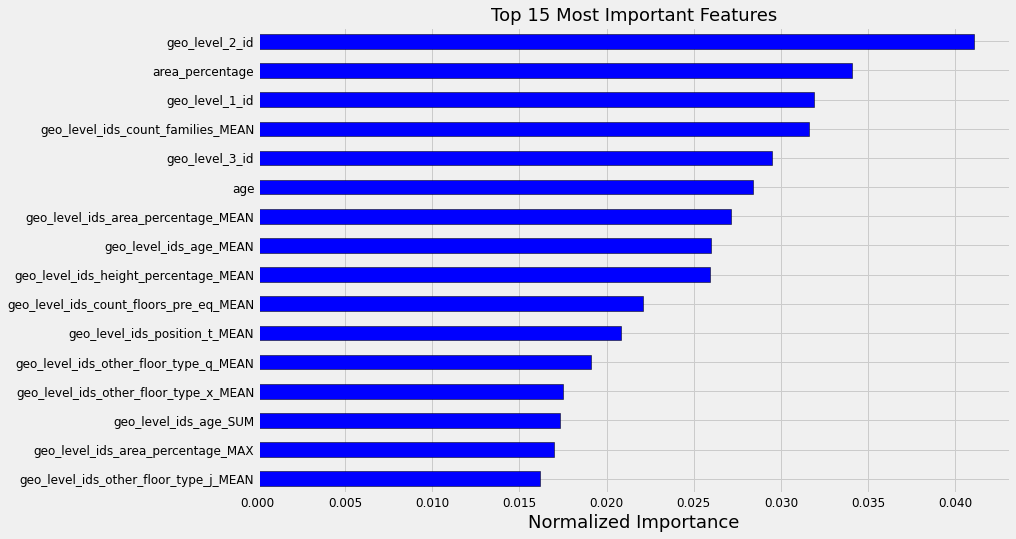

In [100]:
norm_feature_importances = plot_feature_importances(feature_importances)
norm_feature_importances.head(15)

In [101]:
X_train=X_train.drop(columns = zero_features)
X_test=X_test.drop(columns = zero_features)

In [102]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208480 entries, 170377 to 121958
Columns: 146 entries, geo_level_1_id to geo_level_ids_age_SUM
dtypes: float16(123), int8(23)
memory usage: 55.1 MB


In [103]:
X_test.shape

(52121, 146)

# Model Building and Evaluation

In [104]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,confusion_matrix,f1_score,classification_report,accuracy_score
import optuna

In [105]:
base_models=['Logistic Regression','Random Forest Classifier','Xgboost Classifier','LightGBM Classifier','CatBoost Classifier']
models = [LogisticRegression(multi_class='ovr'),RandomForestClassifier(),XGBClassifier(),LGBMClassifier(),CatBoostClassifier(verbose=False)]
f1_train,auc_train=[],[]
f1_test,auc_test=[],[]

## Evalation Metrics

In general, if you are working with an imbalanced dataset where all classes are equally important, using the macro average f1_score would be a good choice as it treats all classes equally.
If you have an imbalanced dataset but want to assign greater contribution to classes with more examples in the dataset, then the weighted average f1_score is preferred.

Our Business Case is to find the damage grade of a building. So we want to predict the probabilities of damage grade and we use the model predict.proba method. The predictions represent a probability between 0 and 1. I will be using the f1_score and roc_auc_score as my evaluation metrics here to get the true measure of the model performance. Since I am showing f1 score for all classes considering all as equally important I will be using the macro average here but what I really want is the probability of damage grade, so I am showing ROC AUC score for all classes (This will also be macro average). So here f1 score is just for showcasing but my main criterion is ROC AUC score moving forward.

In [106]:
i=0
for model in models:
    model=model
    model.fit(X_train,y_train)
    ytrain_pred=model.predict(X_train)
    ytest_pred=model.predict(X_test)
    ytrain_proba=model.predict_proba(X_train) 
    ytest_proba=model.predict_proba(X_test)
    
    # Evaluation
    print("Model : ",base_models[i])
    i=i+1
    print("f1_score of train data : ", f1_score(y_train,ytrain_pred,average='macro'))
    print("ROC AUC of train data : ", roc_auc_score(y_train,ytrain_proba,multi_class='ovr'))
    print("f1_score of test data : ", f1_score(y_test,ytest_pred,average='macro'))
    print("ROC AUC of test data : ", roc_auc_score(y_test,ytest_proba,multi_class='ovr'))
    print('-'*100)
    
    # Append Model Performace Scores to List
    f1_train.append(f1_score(y_train,ytrain_pred,average='macro'))
    auc_train.append(roc_auc_score(y_train,ytrain_proba,multi_class='ovr'))
    f1_test.append(f1_score(y_test,ytest_pred,average='macro'))
    auc_test.append(roc_auc_score(y_test,ytest_proba,multi_class='ovr'))

Model :  Logistic Regression
f1_score of train data :  0.5459597198442081
ROC AUC of train data :  0.7724399304709898
f1_score of test data :  0.5494444869596733
ROC AUC of test data :  0.7726308350243372
----------------------------------------------------------------------------------------------------
Model :  Random Forest Classifier
f1_score of train data :  0.9861044663136244
ROC AUC of train data :  0.9994437853885394
f1_score of test data :  0.6719032584443618
ROC AUC of test data :  0.85260082241007
----------------------------------------------------------------------------------------------------
Model :  Xgboost Classifier
f1_score of train data :  0.7201141088254359
ROC AUC of train data :  0.8955475243463255
f1_score of test data :  0.6860407756521623
ROC AUC of test data :  0.8677128184440446
----------------------------------------------------------------------------------------------------
Model :  LightGBM Classifier
f1_score of train data :  0.6793244143322434
ROC AU

# Model Performance Table

In [107]:
performace = pd.DataFrame(base_models, columns = ['Classifiers'])
performace['f1_score_TrainData'] = f1_train
performace['AUC_TrainData'] = auc_train
performace['f1_score_TestData'] = f1_test
performace['AUC_TestData'] = auc_test
performace

,Classifiers,f1_score_TrainData,AUC_TrainData,f1_score_TestData,AUC_TestData
0,Logistic Regression,0.545960,0.772440,0.549444,0.772631
1,Random Forest Classifier,0.986104,0.999444,0.671903,0.852601
2,Xgboost Classifier,0.720114,0.895548,0.686041,0.867713
3,LightGBM Classifier,0.679324,0.868484,0.669811,0.857445
4,CatBoost Classifier,0.704817,0.886474,0.682877,0.868820


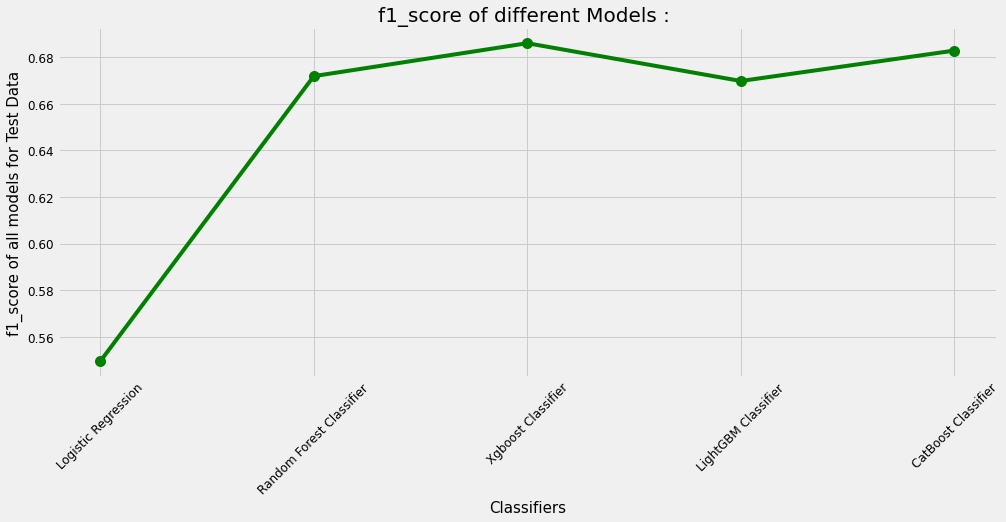

-----------------------------------------------------------------------------------------------------------------------------


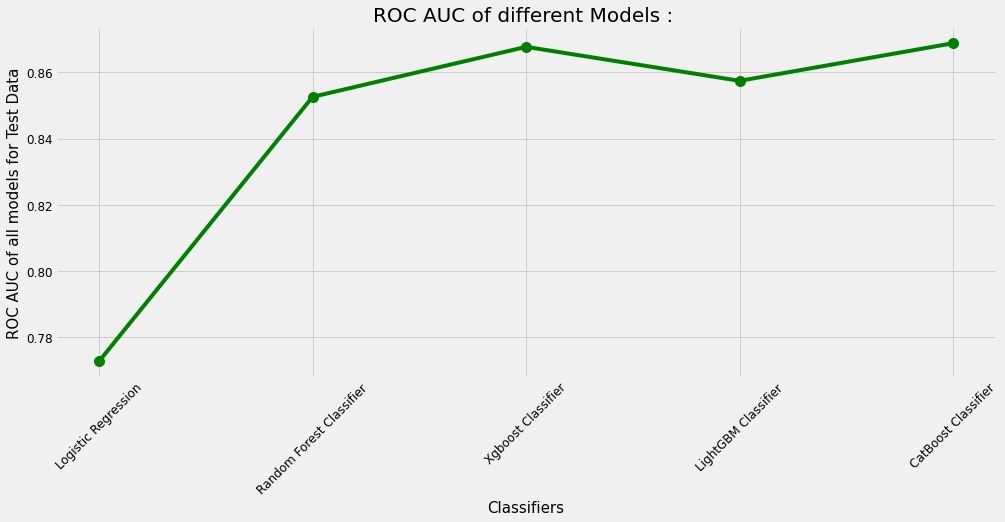

In [108]:
#Plot f1_score
plt.figure(figsize = (15,6))
plt.plot(performace['Classifiers'],performace['f1_score_TestData'],"go-",markersize=10)
plt.xlabel('Classifiers', fontsize = 15)
plt.ylabel('f1_score of all models for Test Data', fontsize = 15)
plt.xticks(rotation=45)
plt.title('f1_score of different Models : ',fontsize = 20)
plt.show()
print('-'*125)
#Plot AUC scores
plt.figure(figsize = (15,6))
plt.plot(performace['Classifiers'],performace['AUC_TestData'],"go-",markersize=10)
plt.xlabel('Classifiers', fontsize = 15)
plt.ylabel('ROC AUC of all models for Test Data', fontsize = 15)
plt.xticks(rotation=45)
plt.title('ROC AUC of different Models : ',fontsize = 20)
plt.show()

> - These ROC AUC values are for test data.
> - We can see that our best base line models are Xgboost Classifier and Catboost Classifier.
> - Let us hyper tune our xgboost model and check results again.

# Xgboost Parameter Optimization

> We will hypertune xgboost using Optuna. Optuna is a hyperparameter optimization software framework that enables users to implement different state-of-the-art algorithms for sampling hyperparameters and pruning unpromising trials. This helps to speed up optimization time and performance greatly compared to traditional methods such as GridSearch. By default, Optuna implements a Bayesian optimization algorithm (TPE) but it can be easily switched to other existing algorithms in the package. It also allows users to plot optimization histories for a better understanding of the model.

In [109]:
def objective(trial,data=X_train,target=y_train):
    
    # Convert to np arrays
    features = np.array(X_train)
    labels = np.array(y_train)
    
    param = {
        'objective': 'multi:softprob',
        'num_class':3,
        'eval_metric':'auc',
        'tree_method':'gpu_hist',
        'n_estimators': 10000,
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'gamma':trial.suggest_int('gamma',0,4),
        'colsample_bytree': trial.suggest_float('colsample_bytree',0.7,1.0),
        'subsample': trial.suggest_float('subsample',0.7,1.0),
        'learning_rate': trial.suggest_float('learning_rate',0.05,0.15),
        'max_depth': trial.suggest_int('max_depth',4,10),
        'min_child_weight': trial.suggest_float('min_child_weight', 1, 10),
    }
    
    model = XGBClassifier(**param,n_jobs=-1,seed=6)   
    kf = StratifiedKFold(n_splits=5) 
    auc = []
    
    # using cross-validation
    for idx in kf.split(features,labels):
        train_idx,valid_idx=idx[0],idx[1]
        
        train_x=features[train_idx]
        train_y=labels[train_idx]
        valid_x=features[valid_idx]
        valid_y=labels[valid_idx]
        
        model.fit(train_x,train_y,eval_set=[(valid_x,valid_y)],early_stopping_rounds=100,verbose=False)
        probs = model.predict_proba(valid_x)
        fold_auc = roc_auc_score(valid_y, probs,multi_class='ovr')
        auc.append(fold_auc)
    
    return np.mean(auc)

In [110]:
%%time

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=25)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2022-06-21 17:33:16,117] A new study created in memory with name: no-name-e82fd77e-b726-4129-aa61-f5d37d03ba50
[I 2022-06-21 17:42:52,300] Trial 0 finished with value: 0.8721094901188711 and parameters: {'lambda': 2.690614016413482, 'alpha': 0.003261549994462587, 'gamma': 3, 'colsample_bytree': 0.7436243258347126, 'subsample': 0.7070007111462019, 'learning_rate': 0.13715919207770755, 'max_depth': 8, 'min_child_weight': 8.509639535638538}. Best is trial 0 with value: 0.8721094901188711.
[I 2022-06-21 17:56:51,520] Trial 1 finished with value: 0.8775997275293174 and parameters: {'lambda': 5.348622891382506, 'alpha': 0.0017227005046061088, 'gamma': 0, 'colsample_bytree': 0.9832018047402118, 'subsample': 0.8328804771427729, 'learning_rate': 0.09921212126891554, 'max_depth': 6, 'min_child_weight': 8.766952624582991}. Best is trial 1 with value: 0.8775997275293174.
[I 2022-06-21 18:09:41,446] Trial 2 finished with value: 0.8524879144063936 and parameters: {'lambda': 0.0035797804258414804,

[I 2022-06-21 21:34:19,784] Trial 21 finished with value: 0.8782497974904315 and parameters: {'lambda': 8.757109228162314, 'alpha': 2.242102634352799, 'gamma': 0, 'colsample_bytree': 0.9409057617025827, 'subsample': 0.9013238539306313, 'learning_rate': 0.14958633001216823, 'max_depth': 8, 'min_child_weight': 7.172273925394691}. Best is trial 15 with value: 0.8783381942461738.
[I 2022-06-21 21:46:36,700] Trial 22 finished with value: 0.878136114561325 and parameters: {'lambda': 8.907669259458272, 'alpha': 4.107090070630396, 'gamma': 0, 'colsample_bytree': 0.9606710148586018, 'subsample': 0.8972674686267869, 'learning_rate': 0.14965377328718726, 'max_depth': 7, 'min_child_weight': 7.2763902783189875}. Best is trial 15 with value: 0.8783381942461738.
[I 2022-06-21 21:55:28,521] Trial 23 finished with value: 0.8763213763012698 and parameters: {'lambda': 3.676834693672759, 'alpha': 1.0143114894331027, 'gamma': 1, 'colsample_bytree': 0.8142744053211376, 'subsample': 0.9497538860433824, 'lear

Number of finished trials: 25
Best trial: {'lambda': 7.099426691696917, 'alpha': 6.393789465435743, 'gamma': 0, 'colsample_bytree': 0.8021816551881547, 'subsample': 0.8909450410762679, 'learning_rate': 0.14929882238455786, 'max_depth': 7, 'min_child_weight': 2.8775397027608767}
CPU times: total: 5h 27min 24s
Wall time: 4h 34min 42s


In [111]:
Best_trial = study.best_trial.params
Best_trial

{'lambda': 7.099426691696917,
 'alpha': 6.393789465435743,
 'gamma': 0,
 'colsample_bytree': 0.8021816551881547,
 'subsample': 0.8909450410762679,
 'learning_rate': 0.14929882238455786,
 'max_depth': 7,
 'min_child_weight': 2.8775397027608767}

In [112]:
best ={ 'objective' : 'multi:softprob' , 'num_class': 3, 'tree_method' : 'gpu_hist',
'lambda': 7.099426691696917,
'alpha': 6.393789465435743,
'gamma': 0,
'colsample_bytree': 0.8021816551881547,
'subsample': 0.8909450410762679,
'learning_rate': 0.14929882238455786,
'max_depth': 7,
'min_child_weight': 2.8775397027608767
}

In [113]:
%%time

import xgboost as xgb
dtrain = xgb.DMatrix(X_train,y_train)
dtest = xgb.DMatrix(X_test,y_test)

cv_results = xgb.cv(best, dtrain, num_boost_round = 10000, early_stopping_rounds=100, nfold = 5, metrics = 'auc', seed=6)

print('The maximum validation ROC AUC was: {:.5f} with a standard deviation of {:.5f}.'.format(cv_results['test-auc-mean'].iloc[-1], cv_results['test-auc-std'].iloc[-1]))
print('The optimal number of boosting rounds (estimators) was {}.'.format(len(cv_results['test-auc-mean'])))

The maximum validation ROC AUC was: 0.85013 with a standard deviation of 0.00140.
The optimal number of boosting rounds (estimators) was 531.
CPU times: total: 13min 17s
Wall time: 13min 4s


In [114]:
# Final Model

xgch=XGBClassifier(**best,n_estimators=531,eval_metric='auc',seed=6)
xgch.fit(X_train,y_train)
ytrain_pred=xgch.predict(X_train)
ytest_pred=xgch.predict(X_test)
ytrain_proba=xgch.predict_proba(X_train) 
ytest_proba=xgch.predict_proba(X_test)

In [115]:
# Evalation

print("f1_score of train data : ", f1_score(y_train,ytrain_pred,average='macro'))
print("ROC AUC of train data : ", roc_auc_score(y_train,ytrain_proba,multi_class='ovr'))
print("f1_score of test data : ", f1_score(y_test,ytest_pred,average='macro'))
print("ROC AUC of test data : ", roc_auc_score(y_test,ytest_proba,multi_class='ovr'))

f1_score of train data :  0.7847001216076075
ROC AUC of train data :  0.9340615282376312
f1_score of test data :  0.7061958907162517
ROC AUC of test data :  0.8811444903301172


> - We can see that by hypertuning, our model performance has increased.
> - In Catboost Classifier, AUC is not implemented on GPU. So it uses CPU for metric computation which significantly affect learning time. So I will not be hyperparameter tuning Catboost Classifier.
> - Since this hypertuned Xgboost model gave optimal results, we will go with this as our final model for our dataset.

## Few more Metrics

In [116]:
# Classification Report

print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.71      0.55      0.62      5170
           1       0.75      0.85      0.80     29487
           2       0.77      0.64      0.70     17464

    accuracy                           0.75     52121
   macro avg       0.74      0.68      0.71     52121
weighted avg       0.75      0.75      0.75     52121



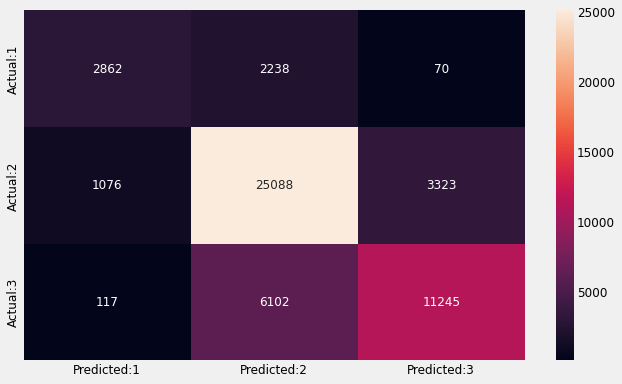

In [117]:
# Confusion Matrix

cf_matrix = confusion_matrix(y_test, ytest_pred)
conf_matrix_df=pd.DataFrame(data=cf_matrix,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                         index=['Actual:1','Actual:2','Actual:3'])
sns.heatmap(conf_matrix_df, annot=True,fmt='g');

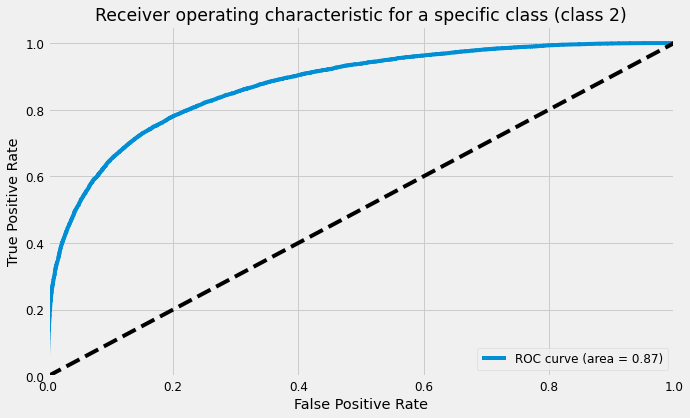

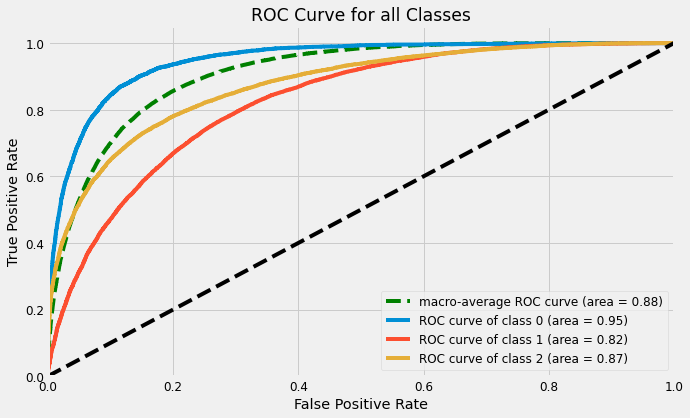

In [118]:
# ROC AUC for all classes

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
ytest1 = label_binarize(y_test, classes=[0,1,2])
n_classes = ytest1.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ytest1[:, i], ytest_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve 
fpr["macro"], tpr["macro"], _ = roc_curve(ytest1.ravel(), ytest_proba.ravel())
roc_auc["macro"] = (roc_auc[0]+roc_auc[1]+roc_auc[2])/3

# Plot of a ROC curve for a specific class (class 2)
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for a specific class (class 2)')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["macro"], tpr["macro"],'g--',
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for all Classes')
plt.legend(loc="lower right")
plt.show()

# Feature Importance

In [119]:
features = list(X_train.columns)
fi = pd.DataFrame({'feature': features,
                   'importance': xgch.feature_importances_})   # considering our best model

In [120]:
def plot_feature_importances(df, n = 15):
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])
    
    plt.rcParams['font.size'] = 12
    
    # Bar plot of n most important features
    df.loc[:n, :].plot.barh(y = 'importance_normalized', 
                            x = 'feature', color = 'blue', edgecolor = 'k', figsize = (12, 8),
                            legend = False)

    plt.xlabel('Normalized Importance', size = 18); plt.ylabel(''); 
    plt.title(f'Top {n} Most Important Features', size = 18)
    plt.gca().invert_yaxis()
    
    
    return df

,index,feature,importance,importance_normalized,cumulative_importance
0,33,foundation_type_r,0.177721,0.177721,0.177721
1,41,ground_floor_type_v,0.072921,0.072921,0.250642
2,9,has_superstructure_mud_mortar_stone,0.046584,0.046584,0.297227
3,0,geo_level_1_id,0.043992,0.043992,0.341219
4,32,foundation_type_i,0.037741,0.037741,0.378960
5,13,has_superstructure_cement_mortar_brick,0.026251,0.026251,0.405211
6,38,roof_type_x,0.023152,0.023152,0.428363
7,86,geo_level_ids_foundation_type_w_MEAN,0.017129,0.017129,0.445492
8,88,geo_level_ids_plan_configuration_m_SUM,0.013503,0.013503,0.458995
9,10,has_superstructure_stone_flag,0.012941,0.012941,0.471936


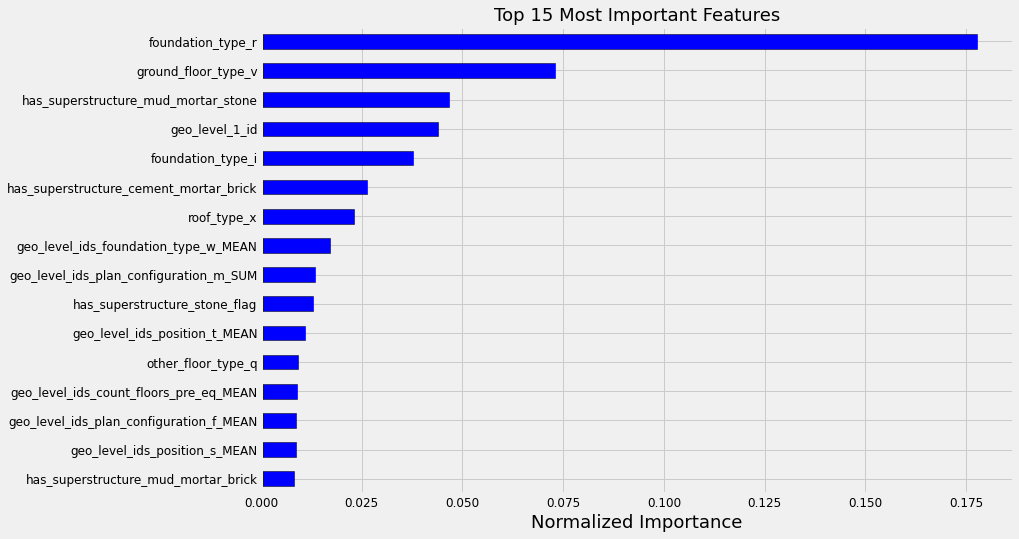

In [121]:
norm_fi = plot_feature_importances(fi, n=15) 
norm_fi.head(15)

# Prediction Results

In [122]:
damage = y_test.copy()
pred_damage = ytest_pred.copy() # of our best model

In [123]:
data=pd.DataFrame(columns=['Damage','Predicted Damage'])
data.iloc[:,0] = damage
data['Damage'] = data['Damage'].replace({0:'Low Damage',1:'Moderate Damage',2:'High Damage'})
data.iloc[:,1] = pred_damage
data['Predicted Damage'] = data['Predicted Damage'].replace({0:'Low Damage',1:'Moderate Damage',2:'High Damage'})
data.head(10)

,Damage,Predicted Damage
111801,Moderate Damage,Moderate Damage
91817,Moderate Damage,Moderate Damage
251661,Moderate Damage,Moderate Damage
205479,Moderate Damage,Moderate Damage
22618,Moderate Damage,Moderate Damage
227341,Moderate Damage,Moderate Damage
149484,Moderate Damage,Moderate Damage
64311,Moderate Damage,Moderate Damage
208731,High Damage,High Damage
235056,High Damage,High Damage


# Conclusion

With this we have finished our project. An in-depth EDA is presented here. A clearer decription of certain features would have become handy in understanding the data more and maybe even create new features from it. Nevertheless, a good amount of Feature Engineering is done to extract as much information as possible. In the model building phase SMOTE techniques haven't been shown as here as it resulted in poor performances. Different models have been created as well as hypertuning of xgboost is done to get optimal performace. Our best model has achieved a decent ROC AUC score indicating that our errors are minimal which bodes well for real time applications. Thank you.

___